# Final Project Data Mining

| Name           | NRP        | Kelompok   |
| ---            | ---        | ---------- |
| Badruzzaman Nafiz | 5025231196 | Kelompok 12 |
| Daffa Rinali | 5025231209 | Kelompok 12 |
| Filbert Hainsly Martin | 5025231256 | Kelompok 12 |

# Import Library

In [ ]:
# Basic Library
import pandas as pd
import numpy as np
import kagglehub
# Visualisasi
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import zscore
# Preprocessing
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.utils import class_weight
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
# Model Library
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score
from lightgbm import LGBMClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from imblearn.pipeline import Pipeline as ImbPipeline
# Performance evaluation
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score, f1_score, recall_score

# Exploratory Data Analysis

In [ ]:
# Import Dataset
df = pd.read_csv('dynamic_supply_chain_logistics_dataset.csv')

In [ ]:
# Menampilkan Jumlah baris dan Fitur pada dataset
print(f"Jumlah baris data: {df.shape[0]}")
print(f"Jumlah fitur: {df.shape[1]}")

Jumlah baris data: 32065
Jumlah fitur: 26


In [ ]:
# Menampilkan list kolom, tipe data tiap kolom, jumlah baris (entries), jumlah non-null value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32065 entries, 0 to 32064
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   timestamp                        32065 non-null  object 
 1   vehicle_gps_latitude             32065 non-null  float64
 2   vehicle_gps_longitude            32065 non-null  float64
 3   fuel_consumption_rate            32065 non-null  float64
 4   eta_variation_hours              32065 non-null  float64
 5   traffic_congestion_level         32065 non-null  float64
 6   warehouse_inventory_level        32065 non-null  float64
 7   loading_unloading_time           32065 non-null  float64
 8   handling_equipment_availability  32065 non-null  float64
 9   order_fulfillment_status         32065 non-null  float64
 10  weather_condition_severity       32065 non-null  float64
 11  port_congestion_level            32065 non-null  float64
 12  shipping_costs    

In [ ]:
# Mencari jumlah null value tiap kolom
df.isna().sum()

timestamp                          0
vehicle_gps_latitude               0
vehicle_gps_longitude              0
fuel_consumption_rate              0
eta_variation_hours                0
traffic_congestion_level           0
warehouse_inventory_level          0
loading_unloading_time             0
handling_equipment_availability    0
order_fulfillment_status           0
weather_condition_severity         0
port_congestion_level              0
shipping_costs                     0
supplier_reliability_score         0
lead_time_days                     0
historical_demand                  0
iot_temperature                    0
cargo_condition_status             0
route_risk_level                   0
customs_clearance_time             0
driver_behavior_score              0
fatigue_monitoring_score           0
disruption_likelihood_score        0
delay_probability                  0
risk_classification                0
delivery_time_deviation            0
dtype: int64

Tidak ada missing values, sehingga kita tidak perlu melakukan penanganan mengenai hal tersebut

In [ ]:
# Mencari jumlah baris duplikat
# Sepasang atau sekelompok baris disebut duplikat bila nilai setiap kolomnya identik sama
print(df.nunique())
print("Jumlah duplikasi:", df.duplicated().sum())

timestamp                          32065
vehicle_gps_latitude               32065
vehicle_gps_longitude              32065
fuel_consumption_rate              32037
eta_variation_hours                32065
traffic_congestion_level           32065
warehouse_inventory_level          32065
loading_unloading_time             32065
handling_equipment_availability    32065
order_fulfillment_status           32065
weather_condition_severity         32065
port_congestion_level              32065
shipping_costs                     32065
supplier_reliability_score         32065
lead_time_days                     32065
historical_demand                  32065
iot_temperature                    32031
cargo_condition_status             32065
route_risk_level                   32065
customs_clearance_time             32065
driver_behavior_score              32065
fatigue_monitoring_score           32065
disruption_likelihood_score        32030
delay_probability                  32065
risk_classificat

In [ ]:
# Melihat ringkasan statistik dasar
df.describe()

vehicle_gps_latitude  vehicle_gps_longitude  fuel_consumption_rate  \
count          32065.000000           32065.000000           32065.000000   
mean              38.023589             -90.116648               8.011735   
std                6.917909              17.369244               4.264960   
min               30.000000            -119.999998               5.000000   
25%               31.280550            -106.253913               5.019984   
50%               36.413820             -86.293414               5.636036   
75%               44.453655             -73.079367               9.669944   
max               50.000000             -70.000000              19.999875   

       eta_variation_hours  traffic_congestion_level  \
count         32065.000000              3.206500e+04   
mean              2.893068              4.991493e+00   
std               2.274044              3.532048e+00   
min              -1.999993              1.091633e-09   
25%               1.185744              1.474720e+00   
50%               3.882059              4.981244e+00   
75%               4.884355              8.534902e+00   
max               5.000000              9.999999e+00   

       warehouse_inventory_level  loading_unloading_time  \
count               3.206500e+04            32065.000000   
mean                2.992547e+02                2.291669   
std                 3.234435e+02                1.554202   
min                 1.322210e-12                0.500000   
25%                 1.605163e+01                0.774798   
50%                 1.572880e+02                1.917121   
75%                 5.405980e+02                3.734188   
max                 9.999993e+02                5.000000   

       handling_equipment_availability  order_fulfillment_status  \
count                     3.206500e+04              32065.000000   
mean                      3.026954e-01                  0.600740   
std                       3.259146e-01                  0.345672   
min                       4.565769e-16                  0.000001   
25%                       1.710828e-02                  0.277096   
50%                       1.595151e-01                  0.680553   
75%                       5.535954e-01                  0.938160   
max                       9.999995e-01                  1.000000   

       weather_condition_severity  ...  historical_demand  iot_temperature  \
count                3.206500e+04  ...       32065.000000     32065.000000   
mean                 4.976082e-01  ...        6022.001286         0.044792   
std                  3.532853e-01  ...        3427.638017        14.187486   
min                  4.536949e-09  ...         100.002966       -10.000000   
25%                  1.440135e-01  ...        2822.607616        -9.931074   
50%                  4.961781e-01  ...        6785.123209        -7.858681   
75%                  8.498226e-01  ...        9374.252913         6.024012   
max                  1.000000e+00  ...       10000.000000        39.999886   

       cargo_condition_status  route_risk_level  customs_clearance_time  \
count            3.206500e+04      32065.000000            32065.000000   
mean             2.972816e-01          7.001144                2.296448   
std              3.216115e-01          3.236328                1.555932   
min              7.255415e-19          0.000050                0.500000   
25%              1.678269e-02          4.593407                0.776166   
50%              1.549760e-01          8.385605                1.938273   
75%              5.405408e-01          9.836152                3.750817   
max              1.000000e+00         10.000000                5.000000   

       driver_behavior_score  fatigue_monitoring_score  \
count           3.206500e+04              3.206500e+04   
mean            4.983913e-01              6.008723e-01   
std             3.541589e-01              3.458101e-01   
min             4.043927e-09              3

In [ ]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

print("Numerical Columns :", num_cols)
print("Categorical Columns :", cat_cols)


Numerical Columns : ['vehicle_gps_latitude', 'vehicle_gps_longitude', 'fuel_consumption_rate', 'eta_variation_hours', 'traffic_congestion_level', 'warehouse_inventory_level', 'loading_unloading_time', 'handling_equipment_availability', 'order_fulfillment_status', 'weather_condition_severity', 'port_congestion_level', 'shipping_costs', 'supplier_reliability_score', 'lead_time_days', 'historical_demand', 'iot_temperature', 'cargo_condition_status', 'route_risk_level', 'customs_clearance_time', 'driver_behavior_score', 'fatigue_monitoring_score', 'disruption_likelihood_score', 'delay_probability', 'delivery_time_deviation']
Categorical Columns : ['timestamp', 'risk_classification']


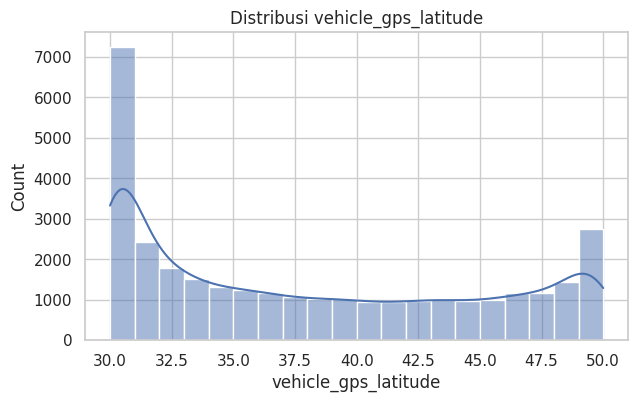

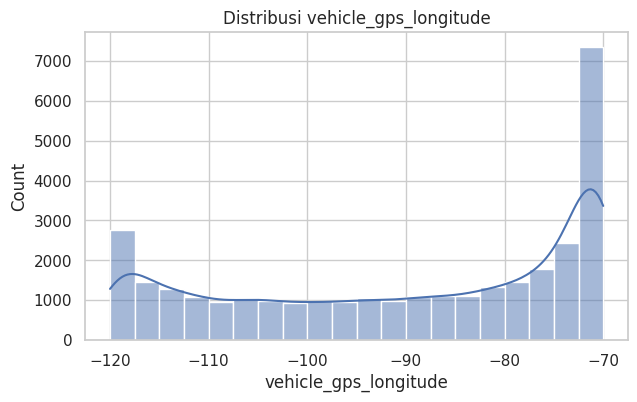

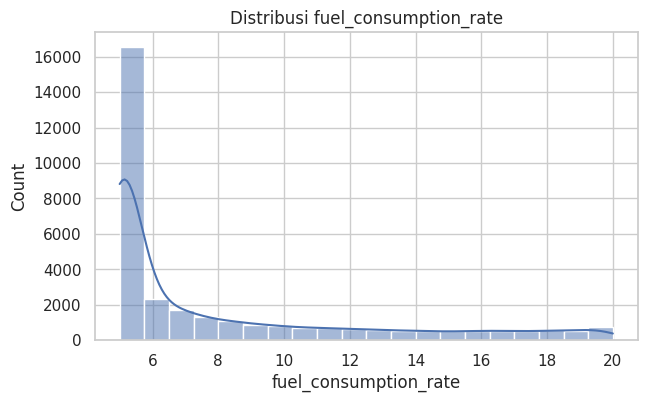

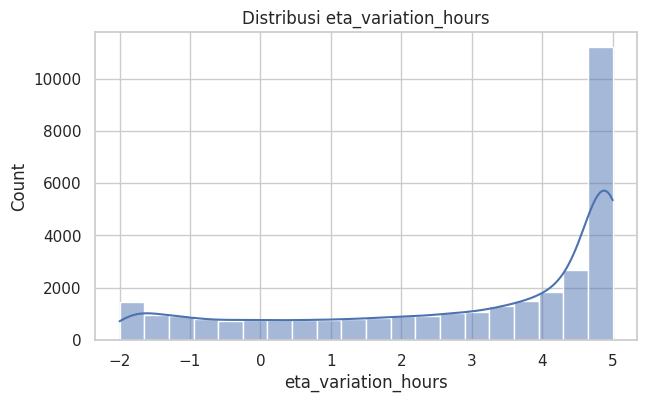

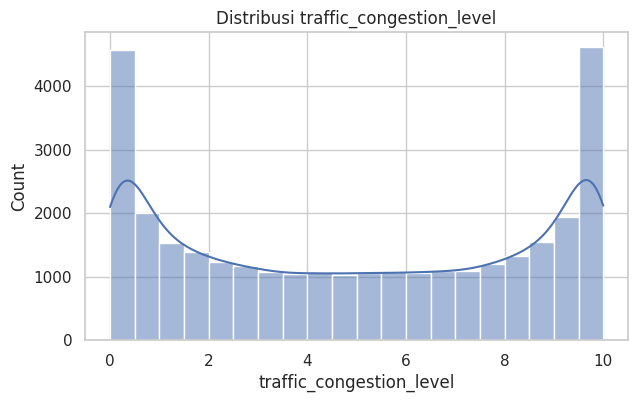

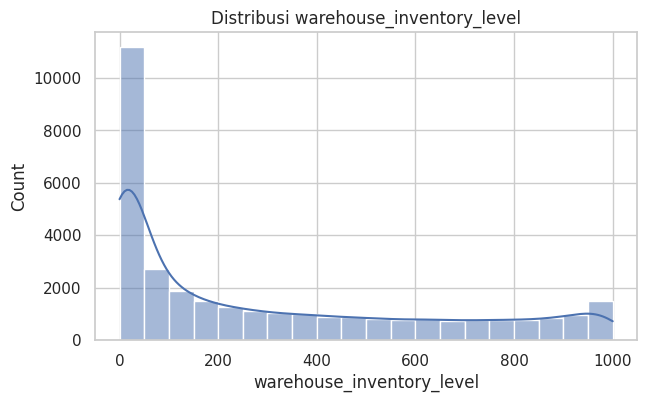

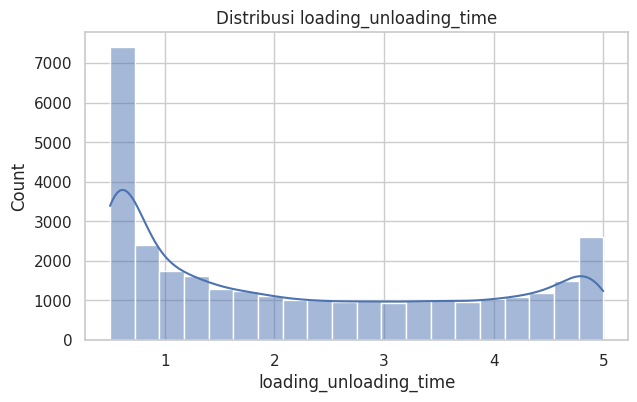

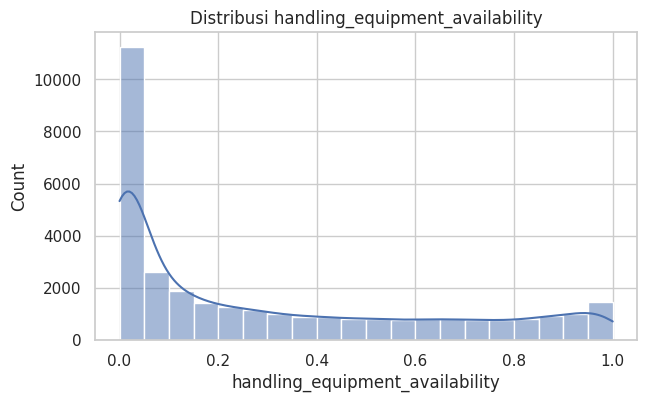

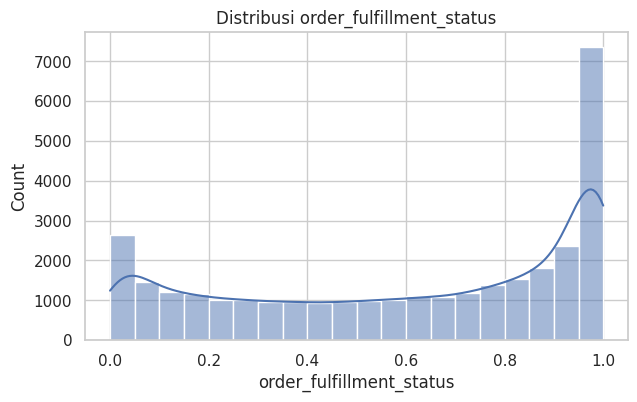

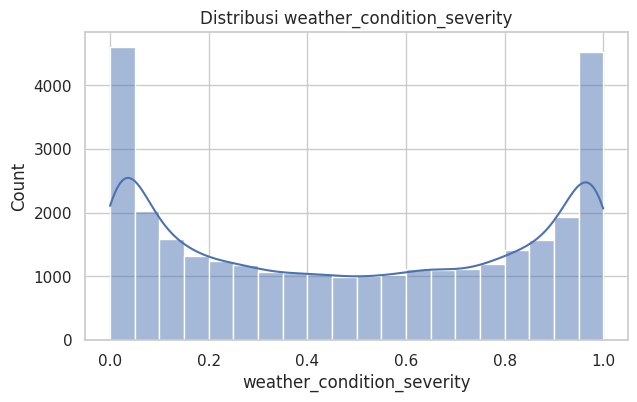

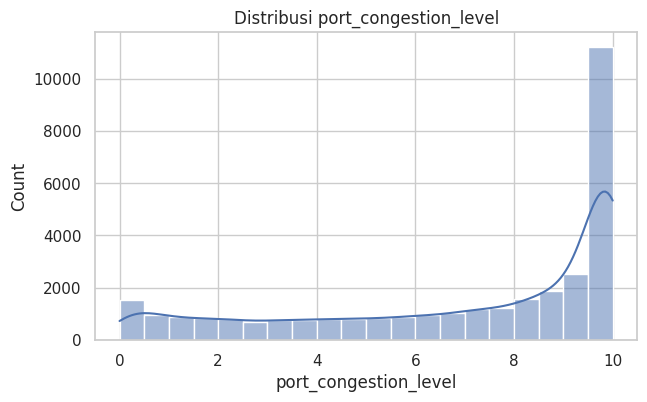

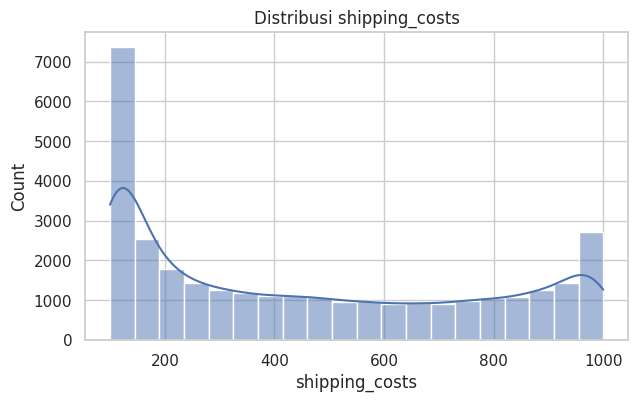

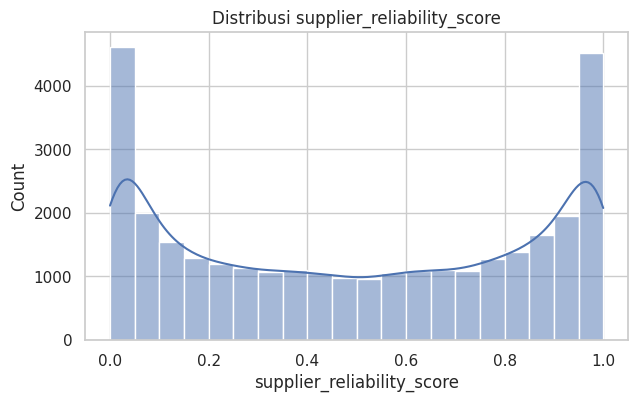

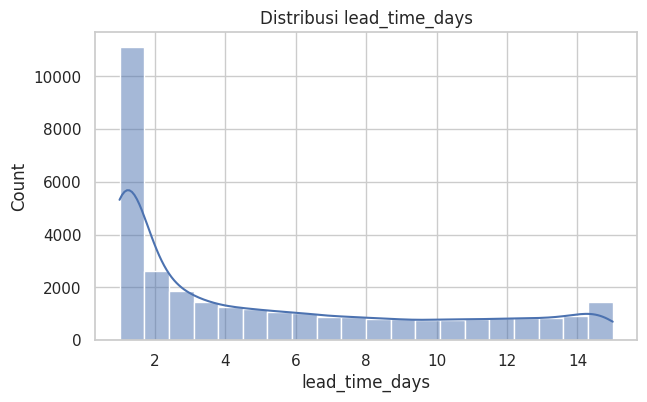

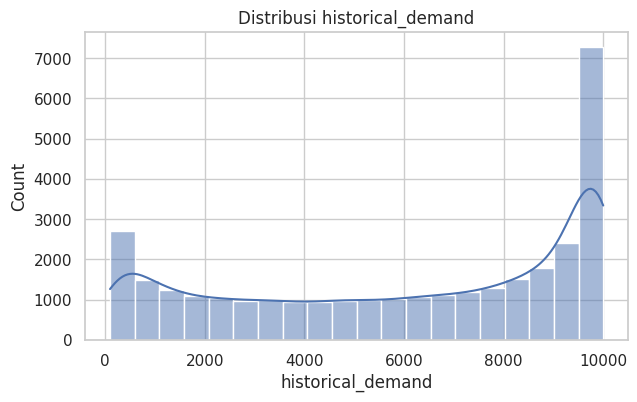

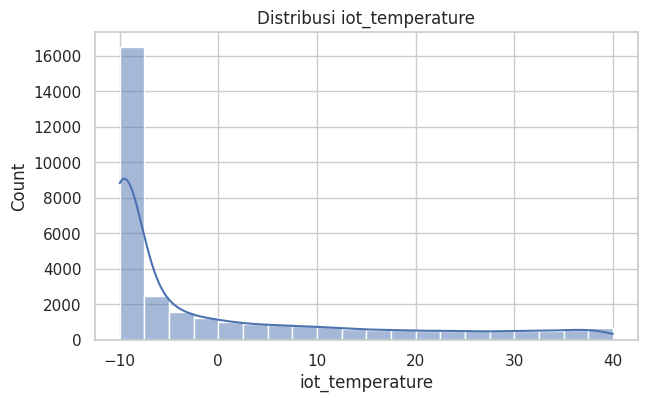

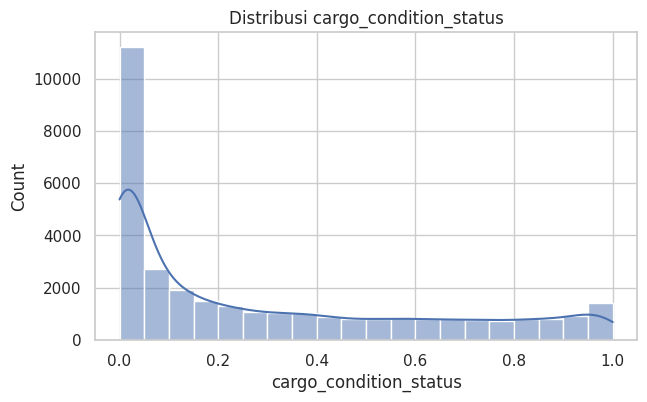

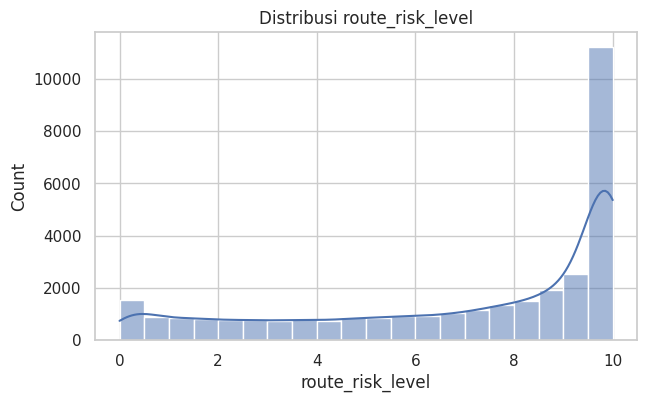

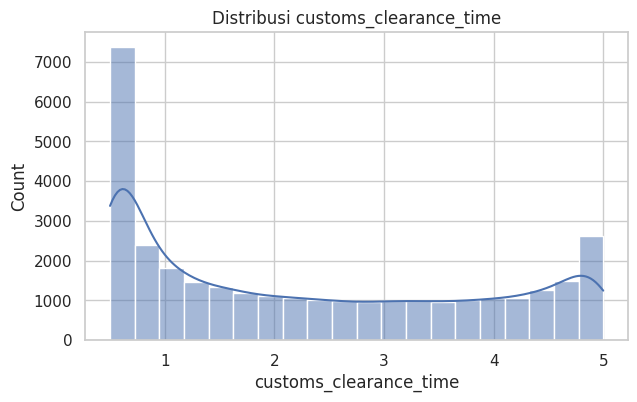

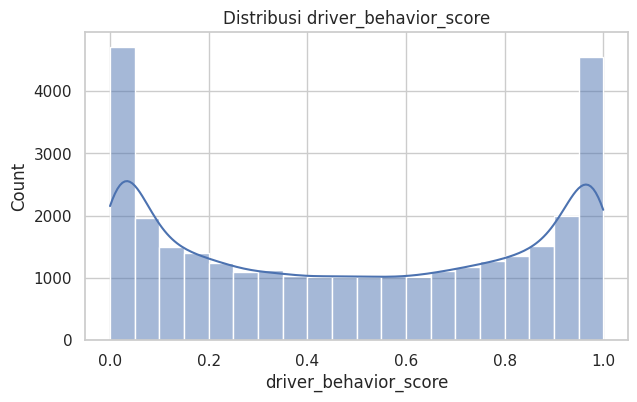

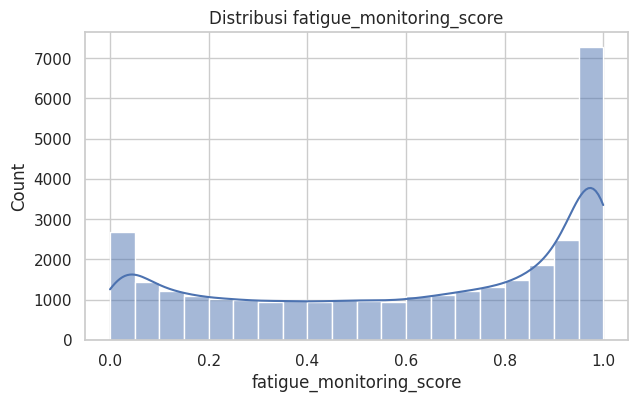

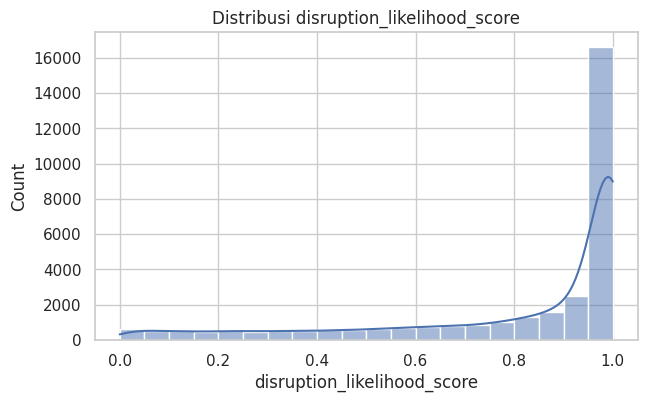

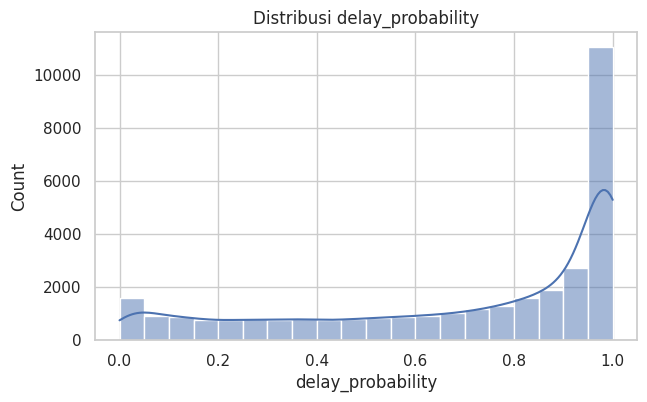

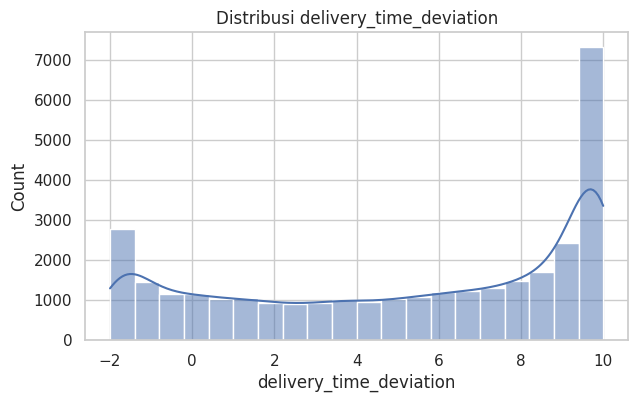

In [ ]:
for col in num_cols:
    plt.figure(figsize=(7,4))
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f"Distribusi {col}")
    plt.show()


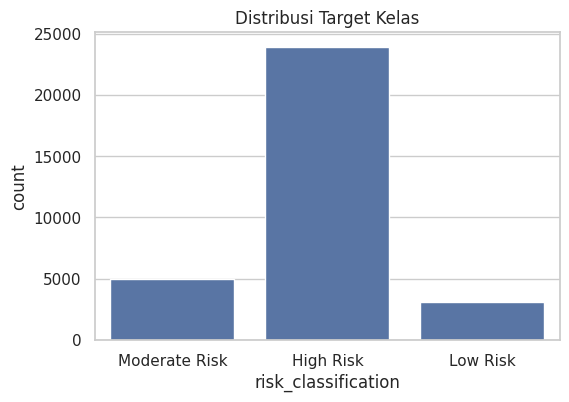

In [ ]:
if "risk_classification" in df.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x="risk_classification")
    plt.title("Distribusi Target Kelas")
    plt.show()

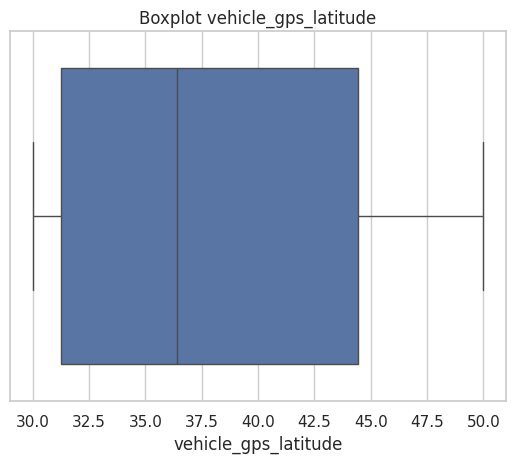

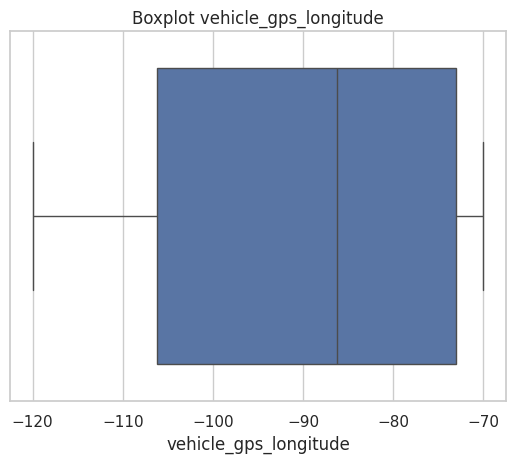

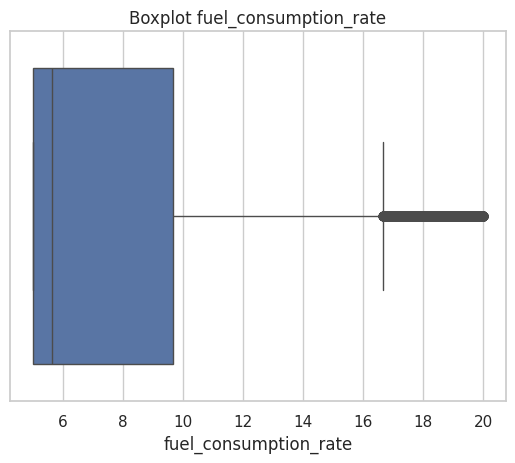

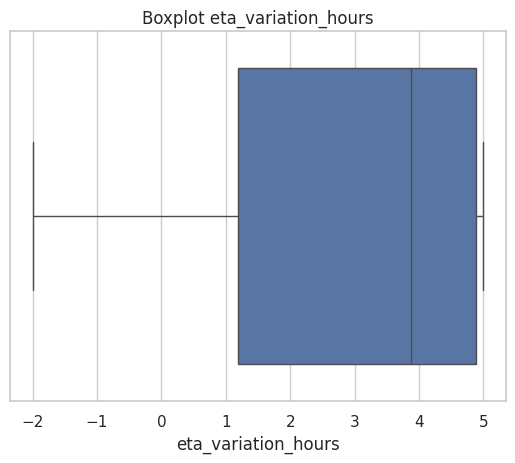

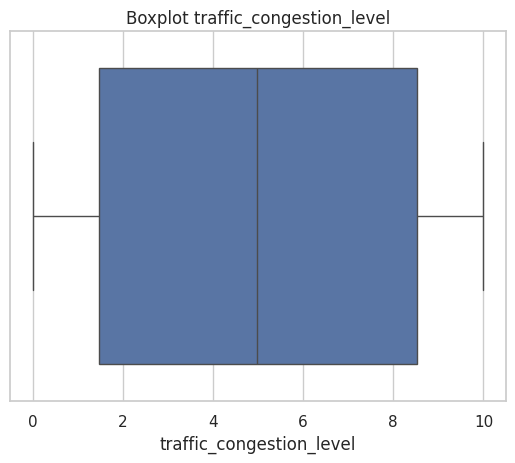

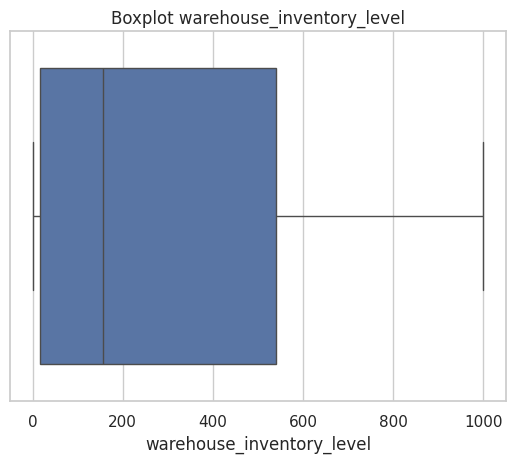

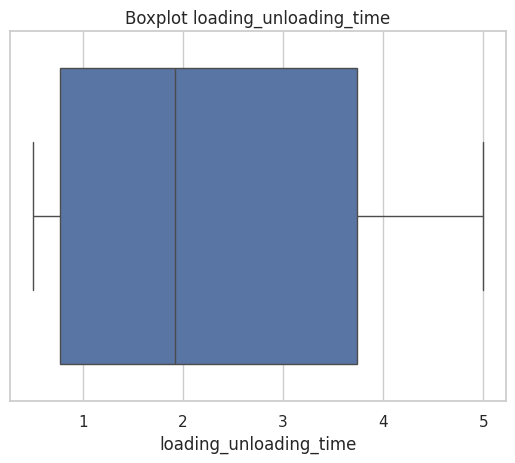

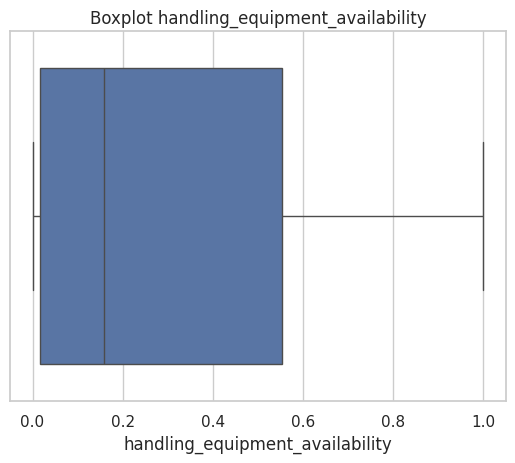

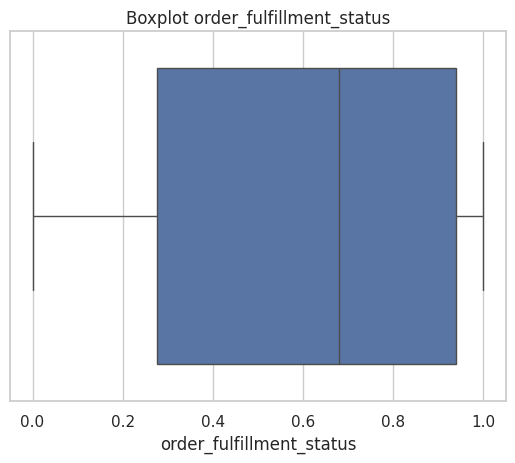

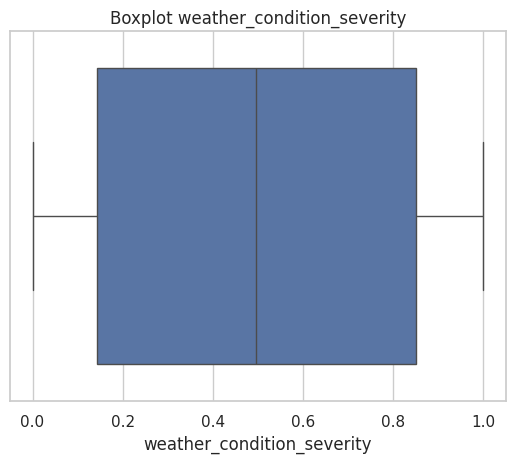

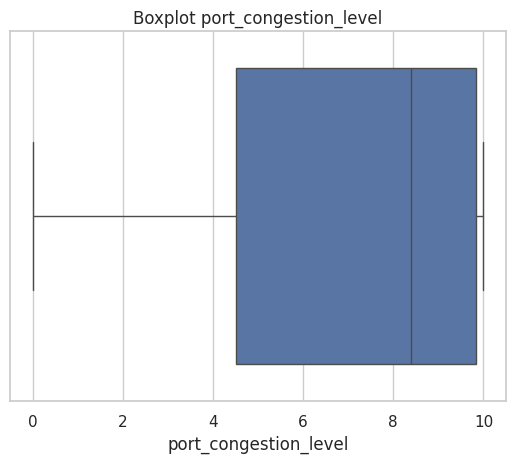

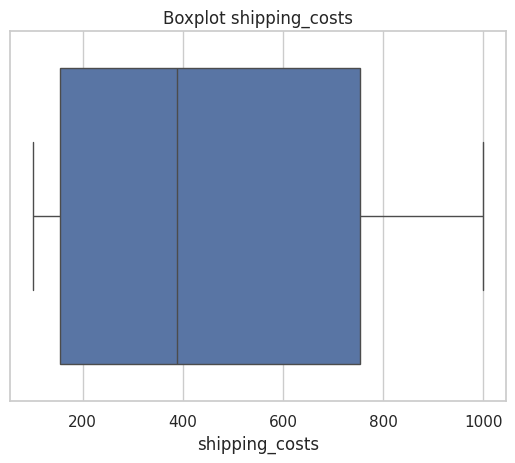

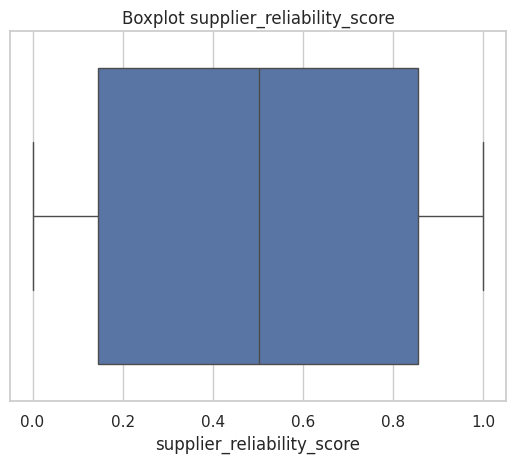

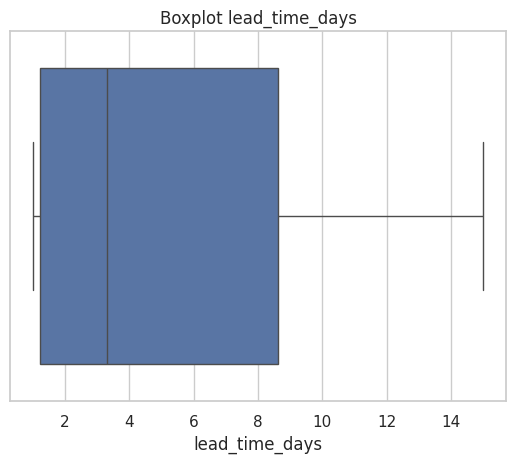

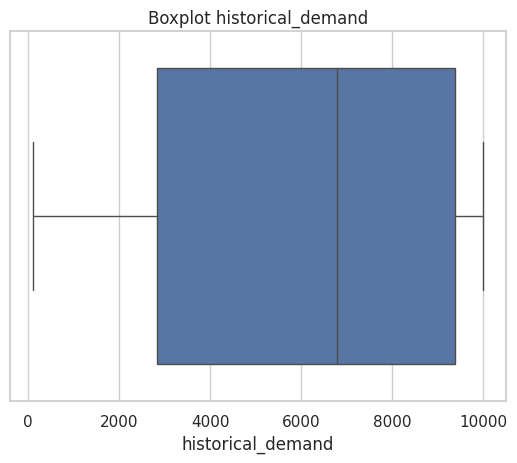

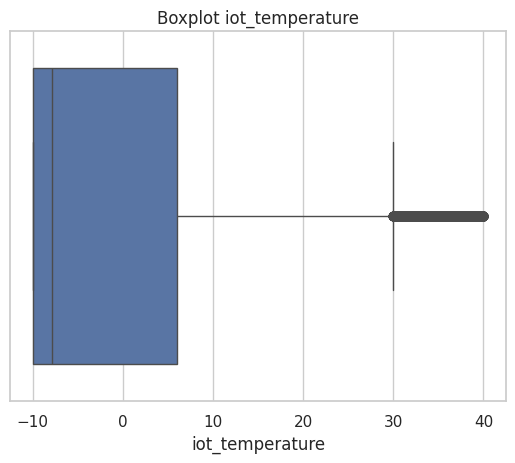

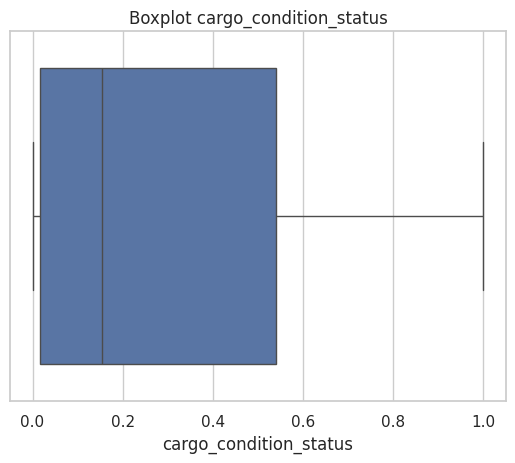

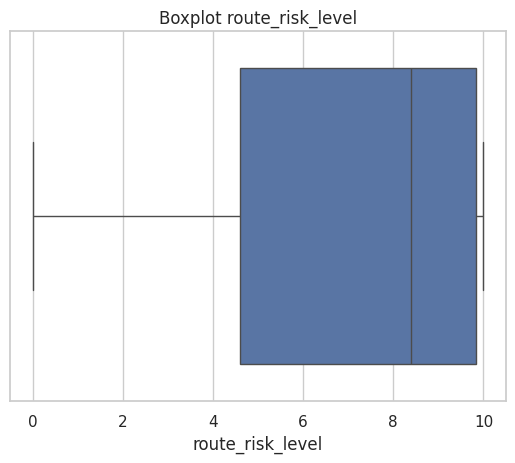

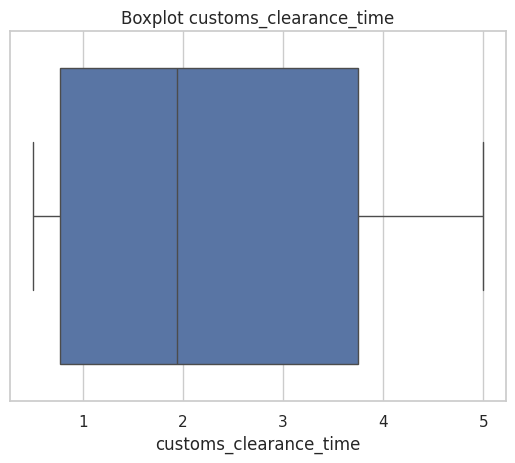

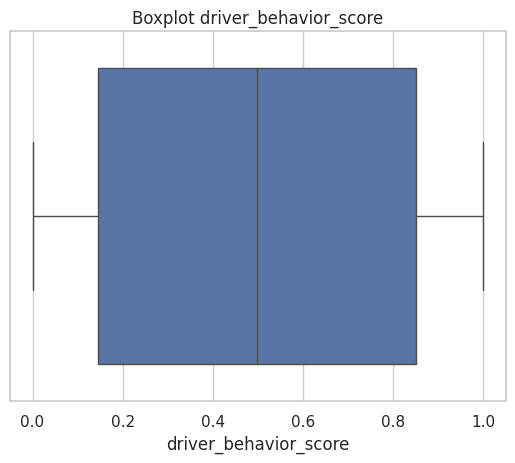

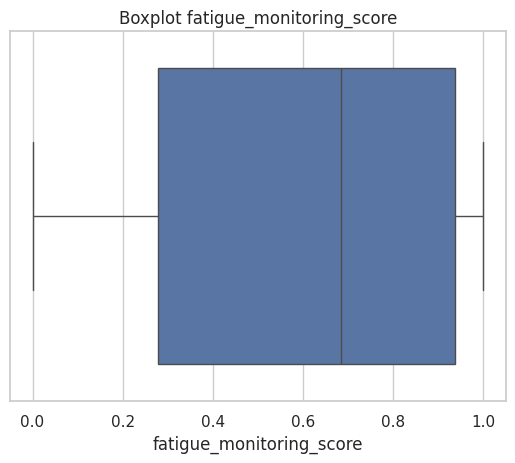

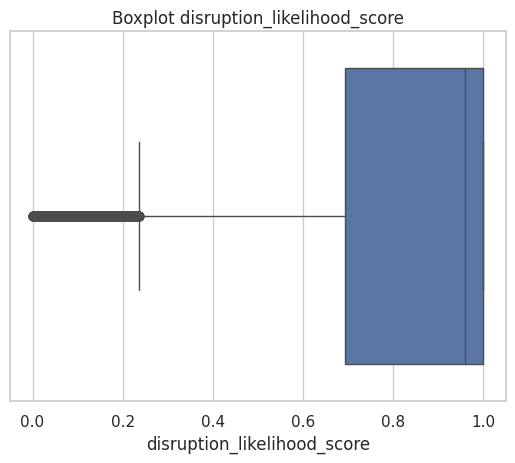

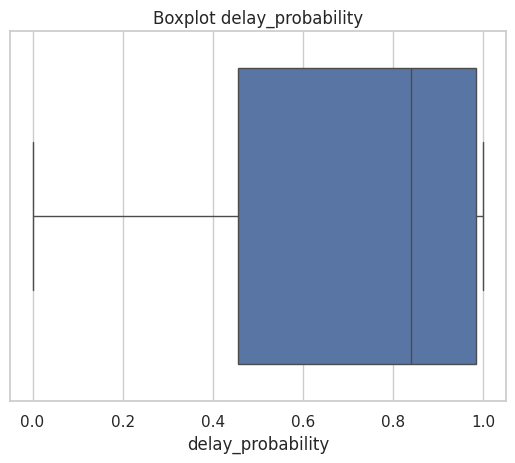

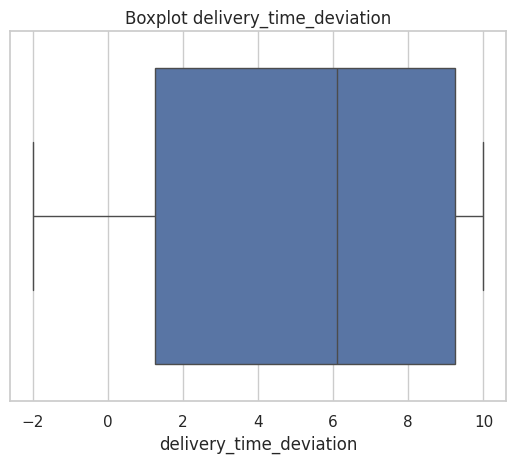

In [ ]:
for col in num_cols:
  plt.figure()
  sns.boxplot(x=df[col])
  plt.title(f"Boxplot {col}")
  plt.show()

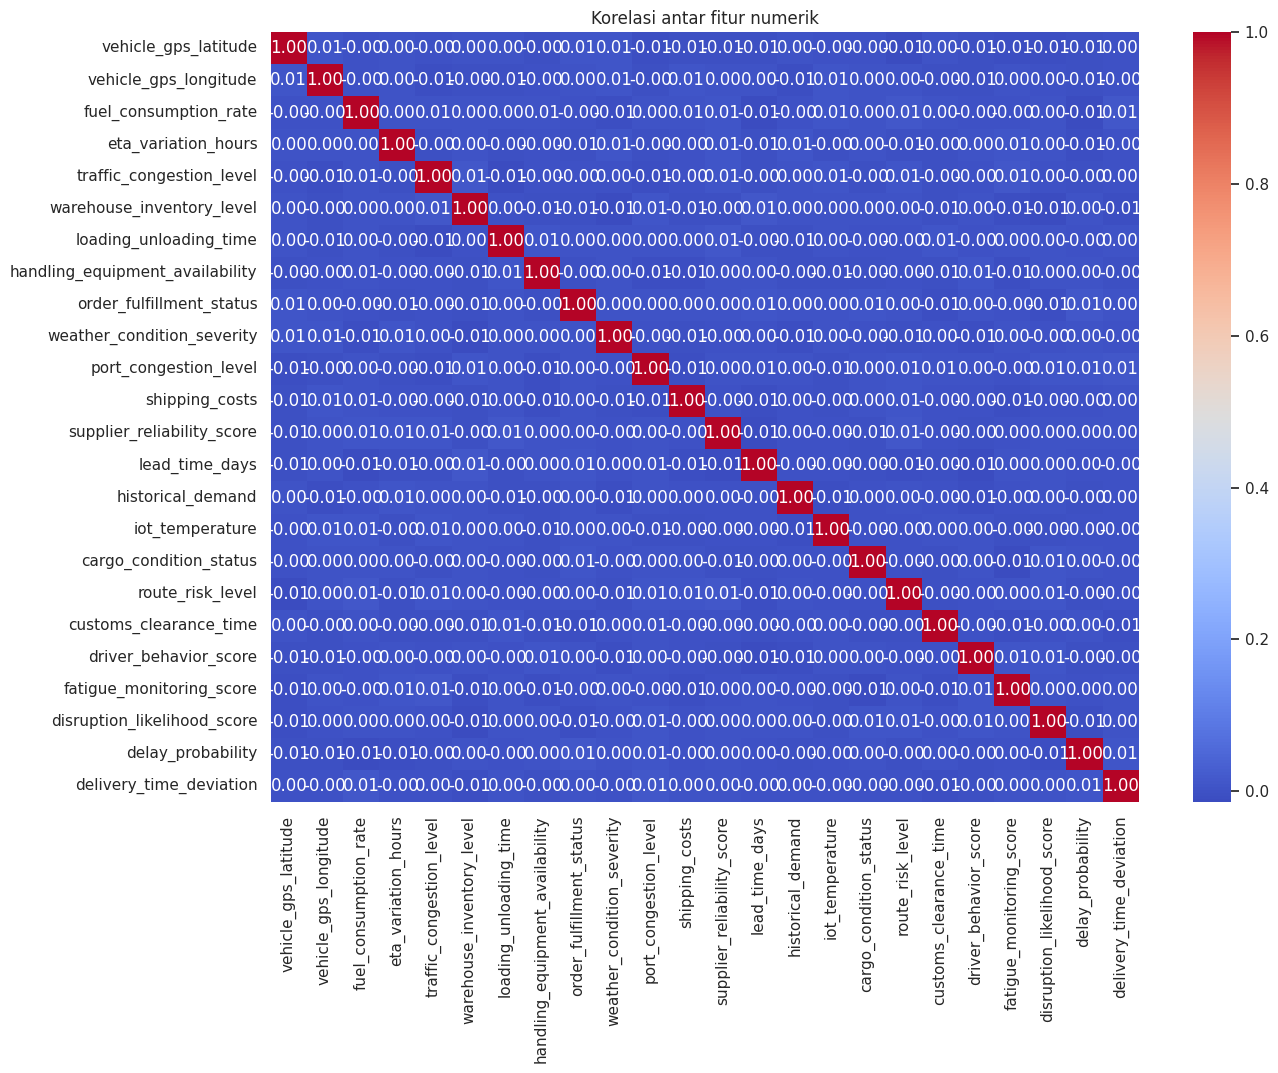

In [ ]:
plt.figure(figsize=(14,10))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelasi antar fitur numerik")
plt.show()

# Preprocessing Data

In [ ]:
def cap_outliers(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df[col] = np.where(df[col] < lower, lower,
                  np.where(df[col] > upper, upper, df[col]))
    return df

df = cap_outliers(df, num_cols)

In [ ]:
df["timestamp"] = pd.to_datetime(df["timestamp"], errors="coerce")
df = df.dropna(subset=["eta_variation_hours"])
df["is_delayed"] = (df["eta_variation_hours"] > 3).astype(int)


In [ ]:

# TIME features
df["hour"] = df["timestamp"].dt.hour
df["day_of_week"] = df["timestamp"].dt.dayofweek
df["month"] = df["timestamp"].dt.month
df["quarter"] = df["timestamp"].dt.quarter
df["is_weekend"] = df["day_of_week"].isin([5, 6]).astype(int)
df["is_peak_hour"] = df["hour"].isin([7, 8, 9, 16, 17, 18]).astype(int)
df["traffic_peak_combo"] = df["is_peak_hour"] * (1 - df["is_weekend"])

def haversine(lat1, lon1, lat2, lon2):
    R = 6371
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1)*np.cos(lat2)*np.sin(dlon/2)**2
    return 2 * R * np.arcsin(np.sqrt(a))

df = df.sort_values(by="timestamp")
df["prev_lat"] = df["vehicle_gps_latitude"].shift(1)
df["prev_lon"] = df["vehicle_gps_longitude"].shift(1)
df["prev_timestamp"] = df["timestamp"].shift(1)

df["distance_km"] = haversine(
    df["prev_lat"], df["prev_lon"],
    df["vehicle_gps_latitude"], df["vehicle_gps_longitude"]
).fillna(0)

df["time_diff_hours"] = (df["timestamp"] - df["prev_timestamp"]).dt.total_seconds() / 3600
df["speed_kmph"] = df["distance_km"] / (df["time_diff_hours"] + 1e-5)
df["speed_kmph_rolling3"] = df["speed_kmph"].rolling(3, min_periods=1).mean()

# Operation features
df["fuel_per_km"] = df["fuel_consumption_rate"] / (df["distance_km"] + 1e-5)
df["loading_ratio"] = df["loading_unloading_time"] / (df["lead_time_days"] * 24 + 1e-5)
df["traffic_weather_interaction"] = df["traffic_congestion_level"] * df["weather_condition_severity"]
df["fatigue_behavior_interaction"] = df["fatigue_monitoring_score"] * (1 - df["driver_behavior_score"])
df["port_traffic_combo"] = df["port_congestion_level"] * df["traffic_congestion_level"]

# Advanced supply chain features
df["efficiency_ratio"] = df["supplier_reliability_score"] / (df["lead_time_days"] + 1e-5)
df["stress_index"] = (
    df["traffic_congestion_level"]
    + df["port_congestion_level"]
    + df["route_risk_level"]
    + df["weather_condition_severity"] * 10
)
df["fatigue_stress_interaction"] = df["fatigue_monitoring_score"] * df["stress_index"]
df["operational_risk_combo"] = (
    df["stress_index"]
    + df["fatigue_behavior_interaction"]
    + df["traffic_weather_interaction"]
)

# Behavior & trend features
df["driver_behavior_rolling3"] = df["driver_behavior_score"].rolling(3, min_periods=1).mean()
df["fatigue_rolling3"] = df["fatigue_monitoring_score"].rolling(3, min_periods=1).mean()
df["acceleration"] = df["speed_kmph"].diff().fillna(0)

print("Feature engineering completed. Shape:", df.shape)

Feature engineering completed. Shape: (32065, 53)


In [ ]:
y = df["is_delayed"]
cols_to_drop = ["risk_classification", "risk_encoded", "is_delayed", "eta_variation_hours"]

X = df.drop(cols_to_drop, axis=1, errors="ignore")

# time-ordered
X = X.sort_values(by="timestamp")
y = y.loc[X.index]

X = X.drop(["timestamp"], axis=1, errors="ignore")


In [ ]:
split_point = int(len(X) * 0.8)
X_train = X.iloc[:split_point]
X_test = X.iloc[split_point:]
y_train = y.iloc[:split_point]
y_test = y.iloc[split_point:]

print("Train:", X_train.shape, "Test:", X_test.shape)

Train: (25652, 49) Test: (6413, 49)


/tmp/ipython-input-2740726793.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette="Set2")


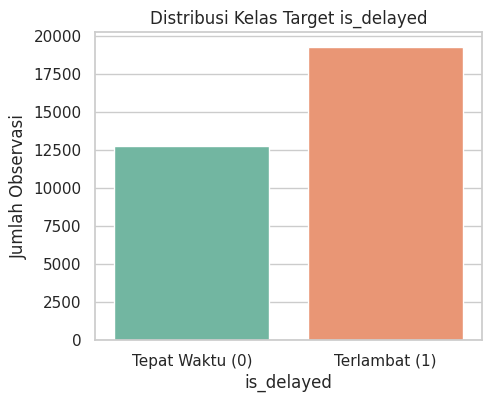

Proporsi kelas:
is_delayed
Terlambat      0.601809
Tepat Waktu    0.398191
Name: proportion, dtype: float64


In [ ]:
plt.figure(figsize=(5,4))
sns.countplot(x=y, palette="Set2")
plt.xticks([0, 1], ["Tepat Waktu (0)", "Terlambat (1)"])
plt.title("Distribusi Kelas Target is_delayed")
plt.ylabel("Jumlah Observasi")
plt.show()

print("Proporsi kelas:")
print(y.value_counts(normalize=True).rename({0: "Tepat Waktu", 1: "Terlambat"}))

In [ ]:
num_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = X.select_dtypes(include=["object", "category"]).columns.tolist()

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocess = ColumnTransformer([
    ("num", numeric_transformer, num_cols),
    ("cat", categorical_transformer, cat_cols)
])

print("Preprocessing pipeline created.")

Preprocessing pipeline created.


#Modelling

In [ ]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

from imblearn.ensemble import BalancedRandomForestClassifier, EasyEnsembleClassifier

from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import ADASYN, BorderlineSMOTE
from imblearn.combine import SMOTETomek, SMOTEENN
from imblearn.under_sampling import RandomUnderSampler

from sklearn.metrics import (
    accuracy_score,
    recall_score,
    precision_score,
    f1_score,
    roc_auc_score
)
from sklearn.base import clone



models = {
    "Logistic Regression": LogisticRegression(
        max_iter=3000,
        class_weight="balanced",
        n_jobs=-1
    ),

    "Decision Tree": DecisionTreeClassifier(
        max_depth=6,
        min_samples_split=20,
        min_samples_leaf=10,
        class_weight="balanced",
        random_state=42
    ),

    "Random Forest": RandomForestClassifier(
        n_estimators=300,
        max_depth=8,
        min_samples_split=20,
        min_samples_leaf=10,
        max_features="sqrt",
        class_weight="balanced_subsample",
        n_jobs=-1,
        random_state=42
    ),

    "Balanced Random Forest": BalancedRandomForestClassifier(
        n_estimators=300,
        max_depth=None,
        sampling_strategy="auto",
        n_jobs=-1,
        random_state=42
    ),

    "EasyEnsemble": EasyEnsembleClassifier(
        n_estimators=20,
        random_state=42
    ),

    "ExtraTrees": ExtraTreesClassifier(
        n_estimators=300,
        max_depth=None,
        min_samples_split=20,
        min_samples_leaf=10,
        class_weight="balanced",
        n_jobs=-1,
        random_state=42
    ),

    "XGBoost": XGBClassifier(
        n_estimators=400,
        max_depth=4,
        learning_rate=0.05,
        subsample=0.7,
        colsample_bytree=0.7,
        reg_alpha=5,          # L1
        reg_lambda=10,        # L2
        min_child_weight=5,
        gamma=5,
        eval_metric="logloss",
        random_state=42,
        n_jobs=-1,
        scale_pos_weight=1.0  # bisa di-tune kalau rasio sangat imbalanced
    ),

    "LightGBM": LGBMClassifier(
        n_estimators=400,
        learning_rate=0.05,
        subsample=0.7,
        colsample_bytree=0.7,
        num_leaves=31,
        min_child_samples=20,
        reg_alpha=5,
        reg_lambda=10,
        class_weight="balanced",
        random_state=42,
        n_jobs=-1
    )
}


In [ ]:
scenario_configs = {
    "1. Baseline (No Resampling)": None,             # pakai data apa adanya
    "2. Cost-Sensitive Only": "cost",               # tidak resampling, hanya class_weight / internal balancing
    "3. SMOTETomek": SMOTETomek(random_state=42),
    "4. Borderline-SMOTE": BorderlineSMOTE(random_state=42),
    "5. SMOTE-ENN": SMOTEENN(random_state=42),
    "6. ADASYN": ADASYN(random_state=42),
    "7. Undersampling": RandomUnderSampler(random_state=42)
}



results = []
overfit_results = []

for scenario_name, sampler_cfg in scenario_configs.items():
    print(f"\n=== Scenario: {scenario_name} ===")

    for model_name, base_model in models.items():
        model = clone(base_model)

        steps = [("preprocess", preprocess)]

        # Atur sampler
        if sampler_cfg is None:
            # Baseline: tidak ada resampling
            sampler = None
        elif sampler_cfg == "cost":
            # Cost-sensitive only: tidak ada resampling,
            # rely on class_weight / internal balancing
            sampler = None
        else:
            sampler = sampler_cfg

        if sampler is not None:
            steps.append(("balance", sampler))

        steps.append(("clf", model))

        pipe = ImbPipeline(steps)

        pipe.fit(X_train, y_train)

        y_pred_test = pipe.predict(X_test)
        y_proba_test = pipe.predict_proba(X_test)[:, 1]

        y_pred_train = pipe.predict(X_train)
        y_proba_train = pipe.predict_proba(X_train)[:, 1]

        acc_test = accuracy_score(y_test, y_pred_test)
        rec_test = recall_score(y_test, y_pred_test, pos_label=1)
        prec_test = precision_score(y_test, y_pred_test, pos_label=1, zero_division=0)
        f1_test = f1_score(y_test, y_pred_test, pos_label=1)
        auc_test = roc_auc_score(y_test, y_proba_test)

        acc_train = accuracy_score(y_train, y_pred_train)
        rec_train = recall_score(y_train, y_pred_train, pos_label=1)
        f1_train = f1_score(y_train, y_pred_train, pos_label=1)
        auc_train = roc_auc_score(y_train, y_proba_train)

        # Simpan hasil
        results.append({
            "Scenario": scenario_name,
            "Model": model_name,
            "Accuracy Test": acc_test,
            "Recall Test": rec_test,
            "Precision Test": prec_test,
            "F1 Test": f1_test,
            "AUC Test": auc_test
        })

        # Simpan hasil OVERFITTING
        overfit_results.append({
            "Scenario": scenario_name,
            "Model": model_name,
            "Accuracy Train": acc_train,
            "Accuracy Test": acc_test,
            "Accuracy Gap": acc_train - acc_test,
            "Recall Train": rec_train,
            "Recall Test": rec_test,
            "Recall Gap": rec_train - rec_test,
            "AUC Train": auc_train,
            "AUC Test": auc_test,
            "AUC Gap": auc_train - auc_test
        })


=== Scenario: 1. Baseline (No Resampling) ===
[LightGBM] [Info] Number of positive: 15454, number of negative: 10198
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011992 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10209
[LightGBM] [Info] Number of data points in the train set: 25652, number of used features: 43
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



=== Scenario: 2. Cost-Sensitive Only ===
[LightGBM] [Info] Number of positive: 15454, number of negative: 10198
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012165 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10209
[LightGBM] [Info] Number of data points in the train set: 25652, number of used features: 43
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



=== Scenario: 3. SMOTETomek ===
[LightGBM] [Info] Number of positive: 14683, number of negative: 14683
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.016087 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10585
[LightGBM] [Info] Number of data points in the train set: 29366, number of used features: 43
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



=== Scenario: 4. Borderline-SMOTE ===
[LightGBM] [Info] Number of positive: 15454, number of negative: 15454
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014312 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10740
[LightGBM] [Info] Number of data points in the train set: 30908, number of used features: 43
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



=== Scenario: 5. SMOTE-ENN ===
[LightGBM] [Info] Number of positive: 2120, number of negative: 7450
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004611 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10547
[LightGBM] [Info] Number of data points in the train set: 9570, number of used features: 43
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



=== Scenario: 6. ADASYN ===
[LightGBM] [Info] Number of positive: 15454, number of negative: 17241
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014875 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10755
[LightGBM] [Info] Number of data points in the train set: 32695, number of used features: 43
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



=== Scenario: 7. Undersampling ===
[LightGBM] [Info] Number of positive: 10198, number of negative: 10198
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009477 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10209
[LightGBM] [Info] Number of data points in the train set: 20396, number of used features: 43
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [ ]:
results_df = pd.DataFrame(results)
overfit_df = pd.DataFrame(overfit_results)

print("\n=== HASIL PERFORMA (TEST) ===")
display(results_df)

print("\n=== CEK OVERFITTING (TRAIN vs TEST) ===")
display(overfit_df)

# Gabungkan metrik test + gap overfitting
metrics_df = results_df.merge(
    overfit_df[["Scenario", "Model", "Accuracy Gap", "Recall Gap", "AUC Gap"]],
    on=["Scenario", "Model"],
    how="left"
)

# Filter kandidat: AUC Test >= 0.5 dan gap tidak terlalu ekstrem
candidates = metrics_df[
    (metrics_df["AUC Test"] >= 0.5) &
    (metrics_df["AUC Gap"].abs() <= 0.30) &    # buang yang overfit banget
    (metrics_df["Recall Gap"].abs() <= 0.35)
].copy()

# Ranking dengan prioritas: Recall Test, lalu F1 Test, lalu AUC Test
candidates_sorted = candidates.sort_values(
    ["Recall Test", "F1 Test", "AUC Test"],
    ascending=[False, False, False]
)

print("\n=== TOP 10 KANDIDAT BERDASARKAN RANKING (Recall→F1→AUC) ===")
display(candidates_sorted.head(10))

best_row = candidates_sorted.iloc[0]
best_scenario = best_row["Scenario"]
best_model_name = best_row["Model"]

print("\n>>> MODEL TERPILIH UNTUK EWS:")
print(f"Scenario : {best_scenario}")
print(f"Model    : {best_model_name}")


=== HASIL PERFORMA (TEST) ===


Scenario                   Model  Accuracy Test  \
0   1. Baseline (No Resampling)     Logistic Regression       0.504756   
1   1. Baseline (No Resampling)           Decision Tree       0.469047   
2   1. Baseline (No Resampling)           Random Forest       0.531109   
3   1. Baseline (No Resampling)  Balanced Random Forest       0.406206   
4   1. Baseline (No Resampling)            EasyEnsemble       0.502417   
5   1. Baseline (No Resampling)              ExtraTrees       0.553407   
6   1. Baseline (No Resampling)                 XGBoost       0.598784   
7   1. Baseline (No Resampling)                LightGBM       0.517075   
8        2. Cost-Sensitive Only     Logistic Regression       0.504756   
9        2. Cost-Sensitive Only           Decision Tree       0.469047   
10       2. Cost-Sensitive Only           Random Forest       0.531109   
11       2. Cost-Sensitive Only  Balanced Random Forest       0.406206   
12       2. Cost-Sensitive Only            EasyEnsemble       0.502417   
13       2. Cost-Sensitive Only              ExtraTrees       0.553407   
14       2. Cost-Sensitive Only                 XGBoost       0.598784   
15       2. Cost-Sensitive Only                LightGBM       0.517075   
16                3. SMOTETomek     Logistic Regression       0.497427   
17                3. SMOTETomek           Decision Tree       0.510993   
18                3. SMOTETomek           Random Forest       0.531576   
19                3. SMOTETomek  Balanced Random Forest       0.433650   
20                3. SMOTETomek            EasyEnsemble       0.504756   
21                3. SMOTETomek              ExtraTrees       0.555902   
22                3. SMOTETomek                 XGBoost       0.528302   
23                3. SMOTETomek                LightGBM       0.547014   
24          4. Borderline-SMOTE     Logistic Regression       0.498831   
25          4. Borderline-SMOTE           Decision Tree       0.481522   
26          4. Borderline-SMOTE           Random Forest       0.527522   
27          4. Borderline-SMOTE  Balanced Random Forest       0.427725   
28          4. Borderline-SMOTE            EasyEnsemble       0.500858   
29          4. Borderline-SMOTE              ExtraTrees       0.553563   
30          4. Borderline-SMOTE                 XGBoost       0.531109   
31          4. Borderline-SMOTE                LightGBM       0.550444   
32                 5. SMOTE-ENN     Logistic Regression       0.496959   
33                 5. SMOTE-ENN           Decision Tree       0.497583   
34                 5. SMOTE-ENN           Random Forest       0.482769   
35                 5. SMOTE-ENN  Balanced Random Forest       0.576953   
36                 5. SMOTE-ENN            EasyEnsemble       0.507719   
37                 5. SMOTE-ENN              ExtraTrees       0.471230   
38                 5. SMOTE-ENN                 XGBoost       0.421020   
39                 5. SMOTE-ENN                LightGBM       0.514892   
40                    6. ADASYN     Logistic Regression       0.497895   
41                    6. ADASYN           Decision Tree       0.518790   
42                    6. ADASYN           Random Forest       0.531576   
43                    6. ADASYN  Balanced Random Forest       0.591767   
44                    6. ADASYN            EasyEnsemble       0.508966   
45                    6. ADASYN              ExtraTrees       0.547170   
46                    6. ADASYN                 XGBoost       0.519258   
47                    6. ADASYN                LightGBM       0.559956   
48             7. Undersampling     Logistic Regression       0.493997   
49             7. Undersampling           Decision Tree       0.496492   
50             7. Undersampling           Random Forest       0.498831   
51             7. Undersampling  Balanced Random Forest       0.403711   
52             7. Undersampling            EasyEnsemble       0.503508   
53             7. Undersamp


=== CEK OVERFITTING (TRAIN vs TEST) ===


Scenario                   Model  Accuracy Train  \
0   1. Baseline (No Resampling)     Logistic Regression        0.512007   
1   1. Baseline (No Resampling)           Decision Tree        0.507524   
2   1. Baseline (No Resampling)           Random Forest        0.796858   
3   1. Baseline (No Resampling)  Balanced Random Forest        1.000000   
4   1. Baseline (No Resampling)            EasyEnsemble        0.527210   
5   1. Baseline (No Resampling)              ExtraTrees        0.999727   
6   1. Baseline (No Resampling)                 XGBoost        0.603033   
7   1. Baseline (No Resampling)                LightGBM        0.874513   
8        2. Cost-Sensitive Only     Logistic Regression        0.512007   
9        2. Cost-Sensitive Only           Decision Tree        0.507524   
10       2. Cost-Sensitive Only           Random Forest        0.796858   
11       2. Cost-Sensitive Only  Balanced Random Forest        1.000000   
12       2. Cost-Sensitive Only            EasyEnsemble        0.527210   
13       2. Cost-Sensitive Only              ExtraTrees        0.999727   
14       2. Cost-Sensitive Only                 XGBoost        0.603033   
15       2. Cost-Sensitive Only                LightGBM        0.874513   
16                3. SMOTETomek     Logistic Regression        0.512124   
17                3. SMOTETomek           Decision Tree        0.537502   
18                3. SMOTETomek           Random Forest        0.610635   
19                3. SMOTETomek  Balanced Random Forest        0.969593   
20                3. SMOTETomek            EasyEnsemble        0.524287   
21                3. SMOTETomek              ExtraTrees        0.961913   
22                3. SMOTETomek                 XGBoost        0.598160   
23                3. SMOTETomek                LightGBM        0.729768   
24          4. Borderline-SMOTE     Logistic Regression        0.510525   
25          4. Borderline-SMOTE           Decision Tree        0.524676   
26          4. Borderline-SMOTE           Random Forest        0.619562   
27          4. Borderline-SMOTE  Balanced Random Forest        1.000000   
28          4. Borderline-SMOTE            EasyEnsemble        0.515087   
29          4. Borderline-SMOTE              ExtraTrees        0.994269   
30          4. Borderline-SMOTE                 XGBoost        0.601980   
31          4. Borderline-SMOTE                LightGBM        0.742944   
32                 5. SMOTE-ENN     Logistic Regression        0.509590   
33                 5. SMOTE-ENN           Decision Tree        0.520817   
34                 5. SMOTE-ENN           Random Forest        0.541010   
35                 5. SMOTE-ENN  Balanced Random Forest        0.676516   
36                 5. SMOTE-ENN            EasyEnsemble        0.523000   
37                 5. SMOTE-ENN              ExtraTrees        0.559722   
38                 5. SMOTE-ENN                 XGBoost        0.431662   
39                 5. SMOTE-ENN                LightGBM        0.592157   
40                    6. ADASYN     Logistic Regression        0.511500   
41                    6. ADASYN           Decision Tree        0.543778   
42                    6. ADASYN           Random Forest        0.604631   
43                    6. ADASYN  Balanced Random Forest        1.000000   
44                    6. ADASYN            EasyEnsemble        0.526236   
45                    6. ADASYN              ExtraTrees        0.989513   
46                    6. ADASYN                 XGBoost        0.587751   
47                    6. ADASYN                LightGBM        0.714447   
48             7. Undersampling     Logistic Regression        0.511500   
49             7. Undersampling           Decision Tree        0.515944   
50             7. Undersampling           Random Forest        0.756081   
51             7. Undersampling  Balanced Random Forest        0.795844   
52             7. Undersampling            EasyE


=== TOP 10 KANDIDAT BERDASARKAN RANKING (Recall→F1→AUC) ===


Scenario                   Model  Accuracy Test  Recall Test  \
35         5. SMOTE-ENN  Balanced Random Forest       0.576953     0.867031   
30  4. Borderline-SMOTE                 XGBoost       0.531109     0.641166   
22        3. SMOTETomek                 XGBoost       0.528302     0.640125   
42            6. ADASYN           Random Forest       0.531576     0.628415   
26  4. Borderline-SMOTE           Random Forest       0.527522     0.619048   
18        3. SMOTETomek           Random Forest       0.531576     0.615925   
41            6. ADASYN           Decision Tree       0.518790     0.605256   
46            6. ADASYN                 XGBoost       0.519258     0.580276   
39         5. SMOTE-ENN                LightGBM       0.514892     0.566745   
44            6. ADASYN            EasyEnsemble       0.508966     0.549571   

    Precision Test   F1 Test  AUC Test  Accuracy Gap  Recall Gap   AUC Gap  
35        0.602096  0.710675  0.504205      0.099563    0.017465  0.180089  
30        0.602151  0.621046  0.502401      0.070872    0.064283  0.113416  
22        0.599707  0.619257  0.506759      0.069858    0.062735  0.102594  
42        0.605112  0.616543  0.504054      0.073055    0.056521  0.156220  
26        0.603042  0.610940  0.505216      0.092040    0.067053  0.176769  
18        0.607702  0.611786  0.506444      0.079058    0.059434  0.162050  
41        0.597176  0.601189  0.500799      0.024988    0.024484  0.046461  
46        0.602703  0.591277  0.505994      0.068494    0.064218  0.101901  
39        0.600993  0.583367  0.501156      0.077265    0.055877  0.116881  
44        0.598300  0.572901  0.502511      0.017270    0.018114  0.019051


>>> MODEL TERPILIH UNTUK EWS:
Scenario : 5. SMOTE-ENN
Model    : Balanced Random Forest


from matplotlib import pyplot as plt
overfit_df['Accuracy Train'].plot(kind='hist', bins=20, title='Accuracy Train')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
overfit_df['Accuracy Test'].plot(kind='hist', bins=20, title='Accuracy Test')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
overfit_df['Accuracy Gap'].plot(kind='hist', bins=20, title='Accuracy Gap')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
overfit_df['Recall Train'].plot(kind='hist', bins=20, title='Recall Train')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
overfit_df.groupby('Scenario').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
overfit_df.groupby('Model').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
overfit_df.plot(kind='scatter', x='Accuracy Train', y='Accuracy Test', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
overfit_df.plot(kind='scatter', x='Accuracy Test', y='Accuracy Gap', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
overfit_df.plot(kind='scatter', x='Accuracy Gap', y='Recall Train', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
overfit_df.plot(kind='scatter', x='Recall Train', y='Recall Test', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
overfit_df['Accuracy Train'].plot(kind='line', figsize=(8, 4), title='Accuracy Train')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
overfit_df['Accuracy Test'].plot(kind='line', figsize=(8, 4), title='Accuracy Test')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
overfit_df['Accuracy Gap'].plot(kind='line', figsize=(8, 4), title='Accuracy Gap')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
overfit_df['Recall Train'].plot(kind='line', figsize=(8, 4), title='Recall Train')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Model'].value_counts()
    for x_label, grp in overfit_df.groupby('Scenario')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Scenario')
_ = plt.ylabel('Model')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(overfit_df['Scenario'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(overfit_df, x='Accuracy Train', y='Scenario', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(overfit_df['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(overfit_df, x='Accuracy Train', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(overfit_df['Scenario'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(overfit_df, x='Accuracy Test', y='Scenario', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(overfit_df['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(overfit_df, x='Accuracy Test', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Accuracy Test'].plot(kind='hist', bins=20, title='Accuracy Test')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Recall Test'].plot(kind='hist', bins=20, title='Recall Test')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Precision Test'].plot(kind='hist', bins=20, title='Precision Test')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('Scenario').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('Model').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='index', y='Accuracy Test', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Accuracy Test', y='Recall Test', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='Recall Test', y='Precision Test', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9.plot(kind='scatter', x='Precision Test', y='F1 Test', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Accuracy Test']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Scenario')):
  _plot_series(series, series_name, i)
  fig.legend(title='Scenario', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Accuracy Test')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Accuracy Test']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Model')):
  _plot_series(series, series_name, i)
  fig.legend(title='Model', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Accuracy Test')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Recall Test']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Scenario')):
  _plot_series(series, series_name, i)
  fig.legend(title='Scenario', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Recall Test')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Recall Test']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_13.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Model')):
  _plot_series(series, series_name, i)
  fig.legend(title='Model', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Recall Test')

from matplotlib import pyplot as plt
_df_14['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['Accuracy Test'].plot(kind='line', figsize=(8, 4), title='Accuracy Test')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_16['Recall Test'].plot(kind='line', figsize=(8, 4), title='Recall Test')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_17['Precision Test'].plot(kind='line', figsize=(8, 4), title='Precision Test')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Model'].value_counts()
    for x_label, grp in _df_18.groupby('Scenario')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Scenario')
_ = plt.ylabel('Model')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_19['Scenario'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_19, x='index', y='Scenario', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_20['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_20, x='index', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_21['Scenario'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_21, x='Accuracy Test', y='Scenario', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_22['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_22, x='Accuracy Test', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

Training XGBoost Baseline...
Training Balanced Random Forest + SMOTE-ENN...
Training XGBoost Cost-Sensitive Only...
Training Balanced Random Forest + ADASYN...


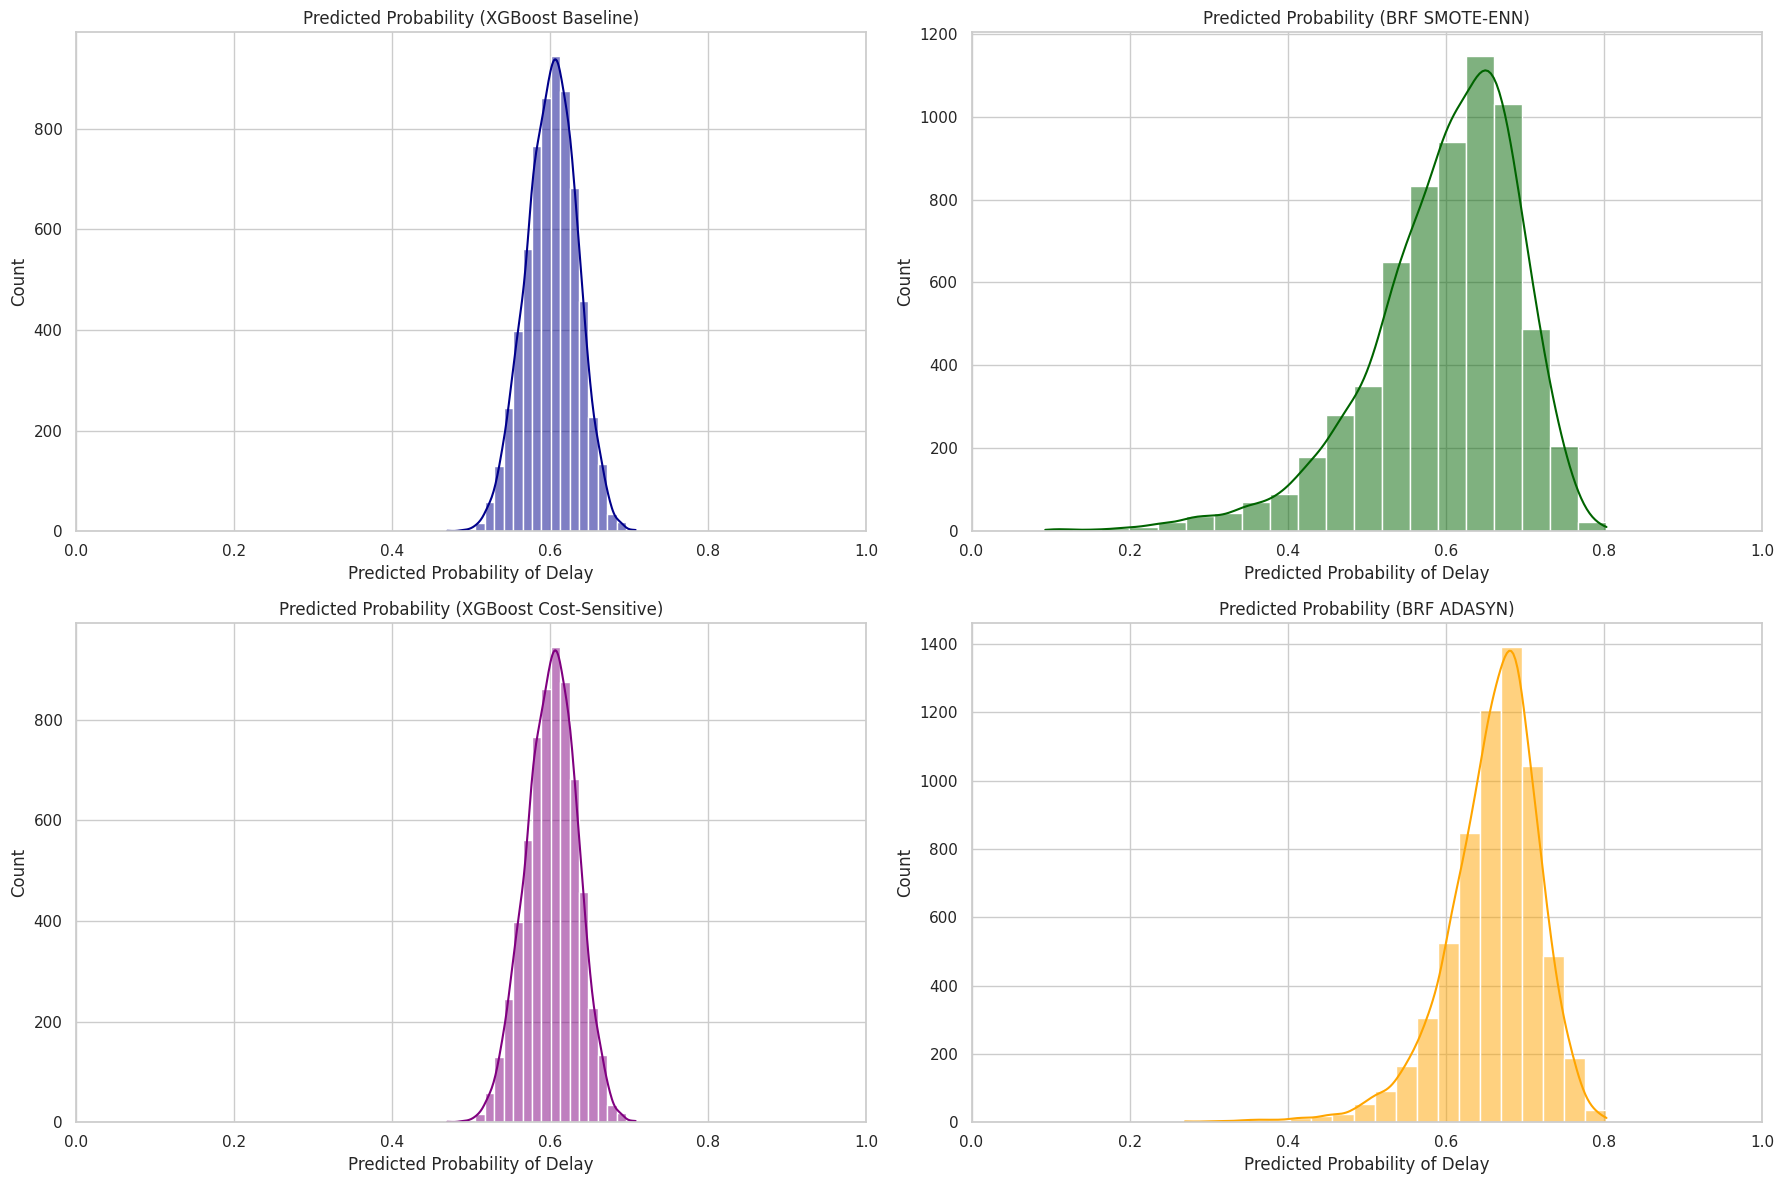

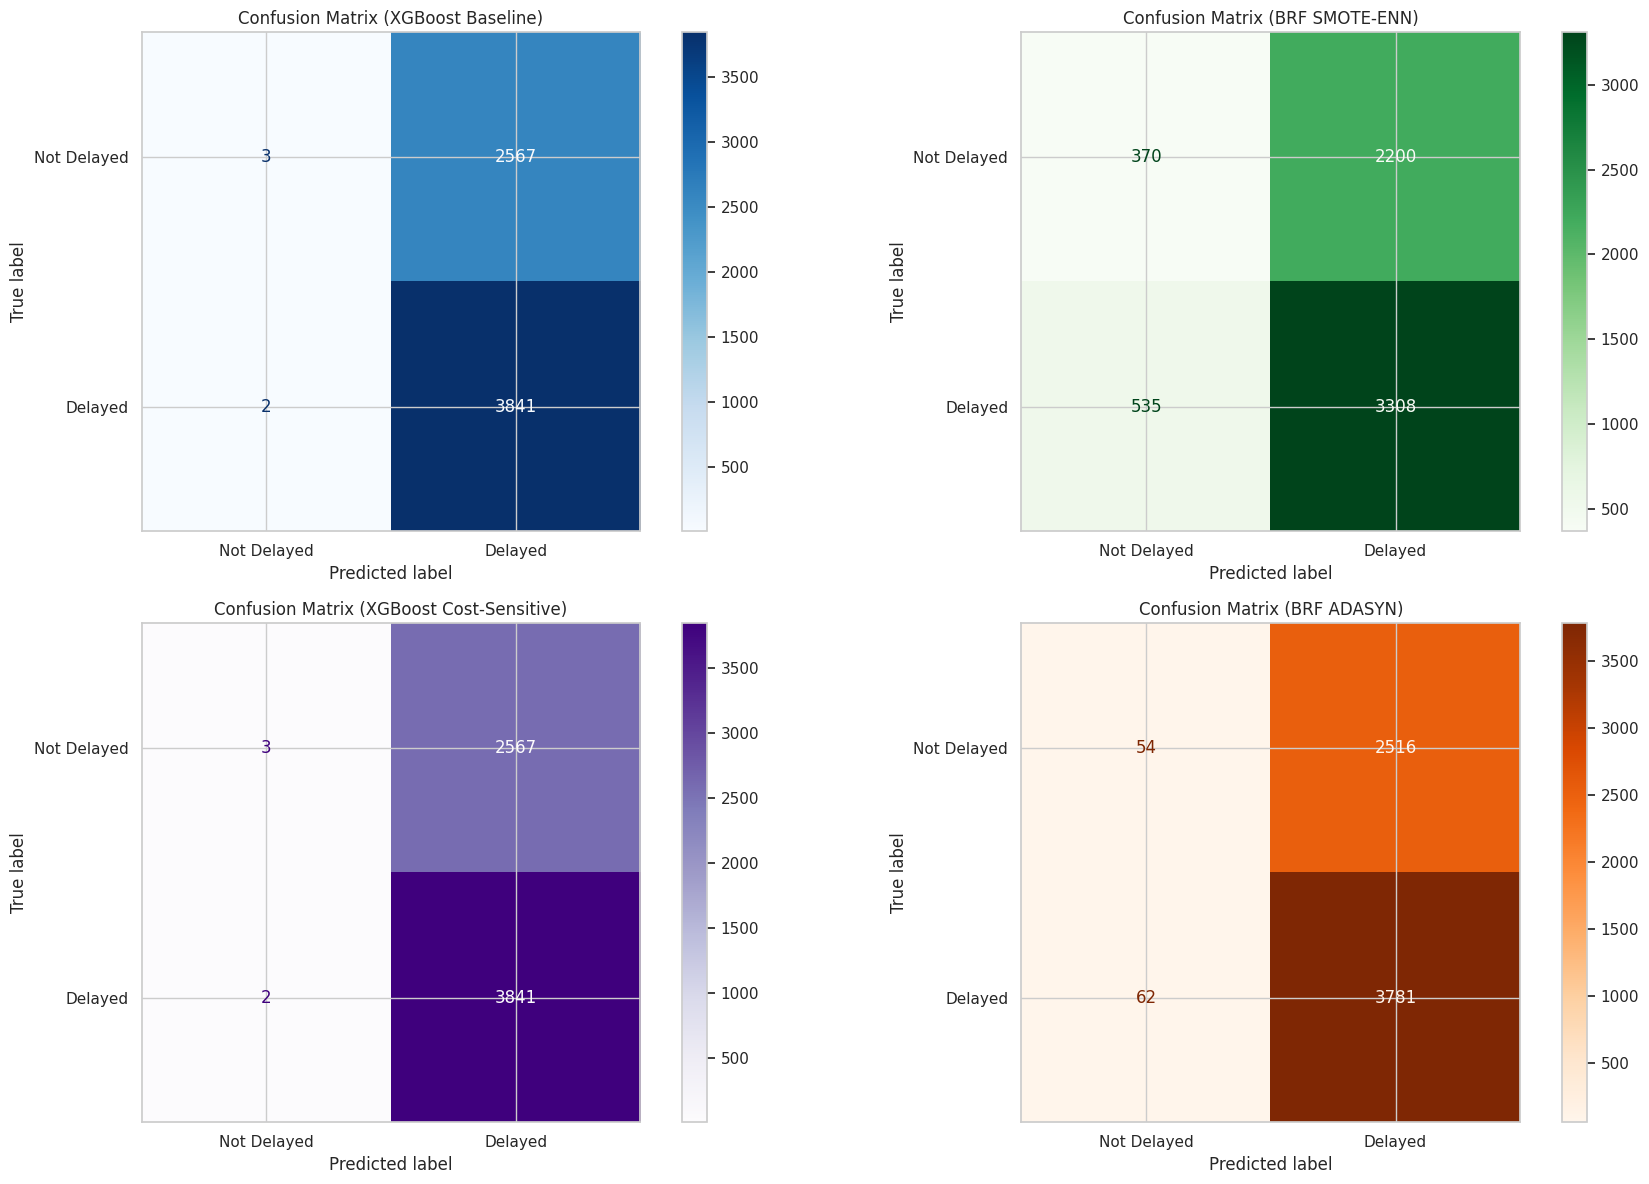

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.base import clone

# --- Retrain Models for Demonstration ---
# Make sure 'preprocess' and 'models' dictionary are defined from previous cells

# 1. XGBoost Baseline
xgb_base_model = clone(models["XGBoost"])
pipe_xgb_baseline = ImbPipeline(steps=[
    ("preprocess", preprocess),
    ("clf", xgb_base_model)
])
print("Training XGBoost Baseline...")
pipe_xgb_baseline.fit(X_train, y_train)

y_proba_xgb_baseline = pipe_xgb_baseline.predict_proba(X_test)[:, 1]
y_pred_xgb_baseline = pipe_xgb_baseline.predict(X_test)

# 2. Balanced Random Forest + SMOTE-ENN
brf_smote_enn_model = clone(models["Balanced Random Forest"])
smote_enn_sampler = SMOTEENN(random_state=42)
pipe_brf_smote_enn = ImbPipeline(steps=[
    ("preprocess", preprocess),
    ("balance", smote_enn_sampler),
    ("clf", brf_smote_enn_model)
])
print("Training Balanced Random Forest + SMOTE-ENN...")
pipe_brf_smote_enn.fit(X_train, y_train)

y_proba_brf_smote_enn = pipe_brf_smote_enn.predict_proba(X_test)[:, 1]
y_pred_brf_smote_enn = pipe_brf_smote_enn.predict(X_test)

# 3. XGBoost Cost-Sensitive Only
# For XGBoost, class_weight is handled via scale_pos_weight or by adjusting the objective function.
# In this setup, the 'models' dictionary already defines XGBoost with scale_pos_weight=1.0
# We'll just create a pipeline for it without an explicit sampler, relying on its internal config.
# If scale_pos_weight was not set, it would be default 1.0, so this is effectively 'no explicit resampling'.
xgb_cost_sensitive_model = clone(models["XGBoost"])
pipe_xgb_cost_sensitive = ImbPipeline(steps=[
    ("preprocess", preprocess),
    ("clf", xgb_cost_sensitive_model)
])
print("Training XGBoost Cost-Sensitive Only...")
pipe_xgb_cost_sensitive.fit(X_train, y_train)

y_proba_xgb_cost_sensitive = pipe_xgb_cost_sensitive.predict_proba(X_test)[:, 1]
y_pred_xgb_cost_sensitive = pipe_xgb_cost_sensitive.predict(X_test)

# 4. Balanced Random Forest + ADASYN
brf_adasyn_model = clone(models["Balanced Random Forest"])
adasyn_sampler = ADASYN(random_state=42)
pipe_brf_adasyn = ImbPipeline(steps=[
    ("preprocess", preprocess),
    ("balance", adasyn_sampler),
    ("clf", brf_adasyn_model)
])
print("Training Balanced Random Forest + ADASYN...")
pipe_brf_adasyn.fit(X_train, y_train)

y_proba_brf_adasyn = pipe_brf_adasyn.predict_proba(X_test)[:, 1]
y_pred_brf_adasyn = pipe_brf_adasyn.predict(X_test)

# --- Visualisasi Distribusi Predicted Probability ---
plt.figure(figsize=(18, 12))

plt.subplot(2, 2, 1)
sns.histplot(y_proba_xgb_baseline, bins=20, kde=True, color='darkblue')
plt.title("Predicted Probability (XGBoost Baseline)")
plt.xlabel("Predicted Probability of Delay")
plt.ylabel("Count")
plt.xlim(0, 1)

plt.subplot(2, 2, 2)
sns.histplot(y_proba_brf_smote_enn, bins=20, kde=True, color='darkgreen')
plt.title("Predicted Probability (BRF SMOTE-ENN)")
plt.xlabel("Predicted Probability of Delay")
plt.ylabel("Count")
plt.xlim(0, 1)

plt.subplot(2, 2, 3)
sns.histplot(y_proba_xgb_cost_sensitive, bins=20, kde=True, color='purple')
plt.title("Predicted Probability (XGBoost Cost-Sensitive)")
plt.xlabel("Predicted Probability of Delay")
plt.ylabel("Count")
plt.xlim(0, 1)

plt.subplot(2, 2, 4)
sns.histplot(y_proba_brf_adasyn, bins=20, kde=True, color='orange')
plt.title("Predicted Probability (BRF ADASYN)")
plt.xlabel("Predicted Probability of Delay")
plt.ylabel("Count")
plt.xlim(0, 1)

plt.tight_layout()
plt.show()

# --- Visualisasi Confusion Matrix ---
plt.figure(figsize=(18, 12))

plt.subplot(2, 2, 1)
cm_xgb_baseline = confusion_matrix(y_test, y_pred_xgb_baseline)
disp_xgb_baseline = ConfusionMatrixDisplay(confusion_matrix=cm_xgb_baseline, display_labels=["Not Delayed", "Delayed"])
disp_xgb_baseline.plot(cmap='Blues', ax=plt.gca())
plt.title("Confusion Matrix (XGBoost Baseline)")

plt.subplot(2, 2, 2)
cm_brf_smote_enn = confusion_matrix(y_test, y_pred_brf_smote_enn)
disp_brf_smote_enn = ConfusionMatrixDisplay(confusion_matrix=cm_brf_smote_enn, display_labels=["Not Delayed", "Delayed"])
disp_brf_smote_enn.plot(cmap='Greens', ax=plt.gca())
plt.title("Confusion Matrix (BRF SMOTE-ENN)")

plt.subplot(2, 2, 3)
cm_xgb_cost_sensitive = confusion_matrix(y_test, y_pred_xgb_cost_sensitive)
disp_xgb_cost_sensitive = ConfusionMatrixDisplay(confusion_matrix=cm_xgb_cost_sensitive, display_labels=["Not Delayed", "Delayed"])
disp_xgb_cost_sensitive.plot(cmap='Purples', ax=plt.gca())
plt.title("Confusion Matrix (XGBoost Cost-Sensitive)")

plt.subplot(2, 2, 4)
cm_brf_adasyn = confusion_matrix(y_test, y_pred_brf_adasyn)
disp_brf_adasyn = ConfusionMatrixDisplay(confusion_matrix=cm_brf_adasyn, display_labels=["Not Delayed", "Delayed"])
disp_brf_adasyn.plot(cmap='Oranges', ax=plt.gca())
plt.title("Confusion Matrix (BRF ADASYN)")

plt.tight_layout()
plt.show()

Training XGBoost Baseline...
Training Balanced Random Forest + SMOTE-ENN...


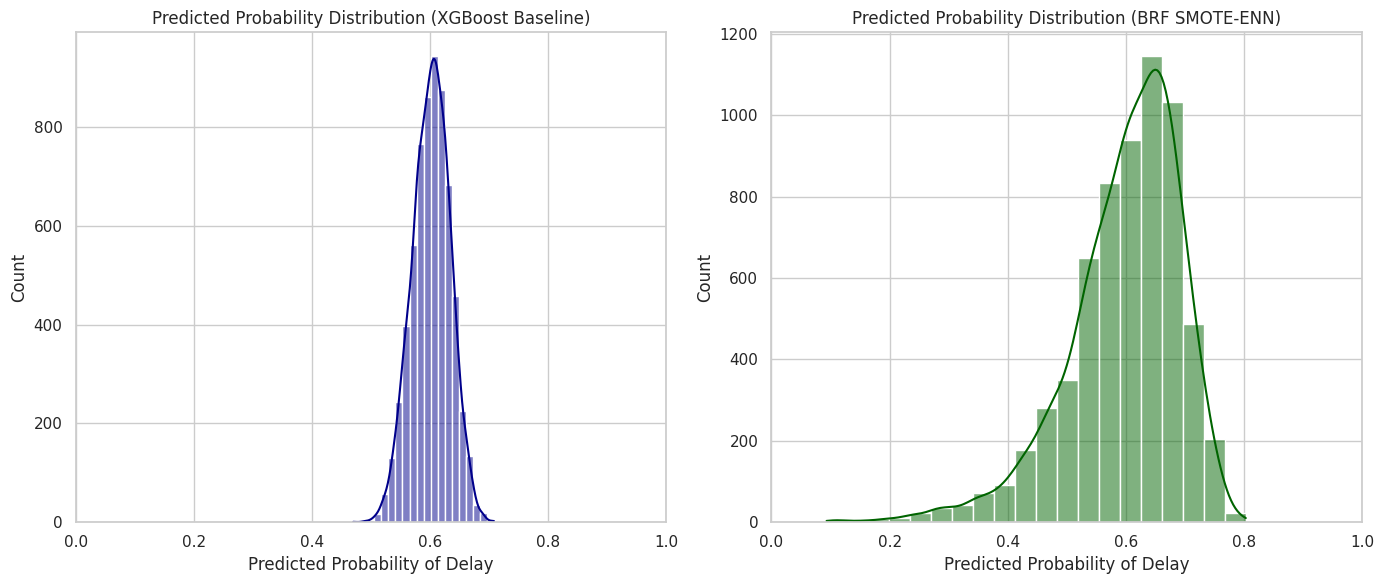

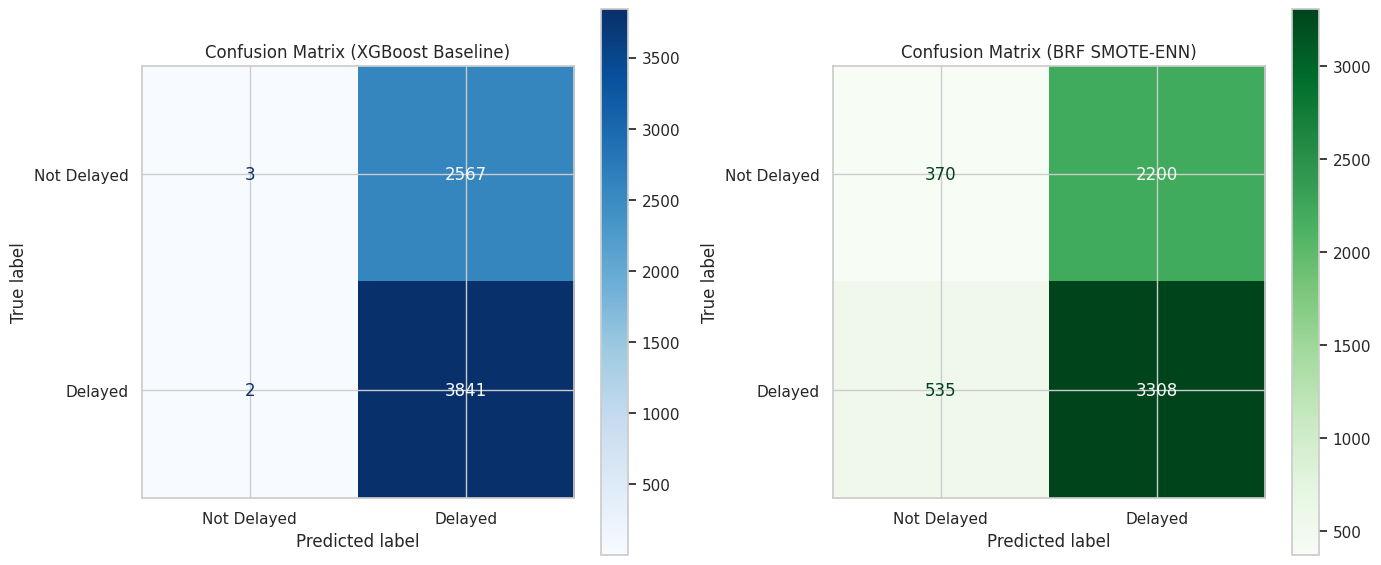

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.base import clone

# --- Retrain Models for Demonstration ---
# Make sure 'preprocess' and 'models' dictionary are defined from previous cells

# 1. XGBoost Baseline
xgb_base_model = clone(models["XGBoost"])
pipe_xgb_baseline = ImbPipeline(steps=[
    ("preprocess", preprocess),
    ("clf", xgb_base_model)
])
print("Training XGBoost Baseline...")
pipe_xgb_baseline.fit(X_train, y_train)

y_proba_xgb_baseline = pipe_xgb_baseline.predict_proba(X_test)[:, 1]
y_pred_xgb_baseline = pipe_xgb_baseline.predict(X_test)

# 2. Balanced Random Forest + SMOTE-ENN
brf_smote_enn_model = clone(models["Balanced Random Forest"])
smote_enn_sampler = SMOTEENN(random_state=42)
pipe_brf_smote_enn = ImbPipeline(steps=[
    ("preprocess", preprocess),
    ("balance", smote_enn_sampler),
    ("clf", brf_smote_enn_model)
])
print("Training Balanced Random Forest + SMOTE-ENN...")
pipe_brf_smote_enn.fit(X_train, y_train)

y_proba_brf_smote_enn = pipe_brf_smote_enn.predict_proba(X_test)[:, 1]
y_pred_brf_smote_enn = pipe_brf_smote_enn.predict(X_test)

# --- Visualisasi Distribusi Predicted Probability ---
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(y_proba_xgb_baseline, bins=20, kde=True, color='darkblue')
plt.title("Predicted Probability Distribution (XGBoost Baseline)")
plt.xlabel("Predicted Probability of Delay")
plt.ylabel("Count")
plt.xlim(0, 1) # Ensure x-axis from 0 to 1

plt.subplot(1, 2, 2)
sns.histplot(y_proba_brf_smote_enn, bins=20, kde=True, color='darkgreen')
plt.title("Predicted Probability Distribution (BRF SMOTE-ENN)")
plt.xlabel("Predicted Probability of Delay")
plt.ylabel("Count")
plt.xlim(0, 1)

plt.tight_layout()
plt.show()

# --- Visualisasi Confusion Matrix ---
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
cm_xgb = confusion_matrix(y_test, y_pred_xgb_baseline)
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=["Not Delayed", "Delayed"])
disp_xgb.plot(cmap='Blues', ax=plt.gca())
plt.title("Confusion Matrix (XGBoost Baseline)")

plt.subplot(1, 2, 2)
cm_brf = confusion_matrix(y_test, y_pred_brf_smote_enn)
disp_brf = ConfusionMatrixDisplay(confusion_matrix=cm_brf, display_labels=["Not Delayed", "Delayed"])
disp_brf.plot(cmap='Greens', ax=plt.gca())
plt.title("Confusion Matrix (BRF SMOTE-ENN)")

plt.tight_layout()
plt.show()

In [ ]:
from imblearn.combine import SMOTEENN
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.ensemble import BalancedRandomForestClassifier

smote_enn = SMOTEENN(random_state=42)

best_brf = BalancedRandomForestClassifier(
    n_estimators=400,
    max_depth=None,
    sampling_strategy="auto",
    n_jobs=-1,
    random_state=42
)

final_ews_pipe = ImbPipeline(steps=[
    ("preprocess", preprocess),
    ("balance", smote_enn),
    ("clf", best_brf)
])

print("Training FINAL BRF + SMOTE-ENN pipeline...")
final_ews_pipe.fit(X_train, y_train)

y_proba_test = final_ews_pipe.predict_proba(X_test)[:, 1]
y_pred_test = final_ews_pipe.predict(X_test)

print("\n=== FINAL MODEL (TH=0.5, TEST SET) ===")
print("Accuracy:", accuracy_score(y_test, y_pred_test))
print("Recall:", recall_score(y_test, y_pred_test))
print("Precision:", precision_score(y_test, y_pred_test))
print("F1:", f1_score(y_test, y_pred_test))
print("AUC:", roc_auc_score(y_test, y_proba_test))


Training FINAL BRF + SMOTE-ENN pipeline...

=== FINAL MODEL (TH=0.5, TEST SET) ===
Accuracy: 0.5785123966942148
Recall: 0.8714545927660682
Precision: 0.602554875854624
F1: 0.7124773960216998
AUC: 0.5028889253390114


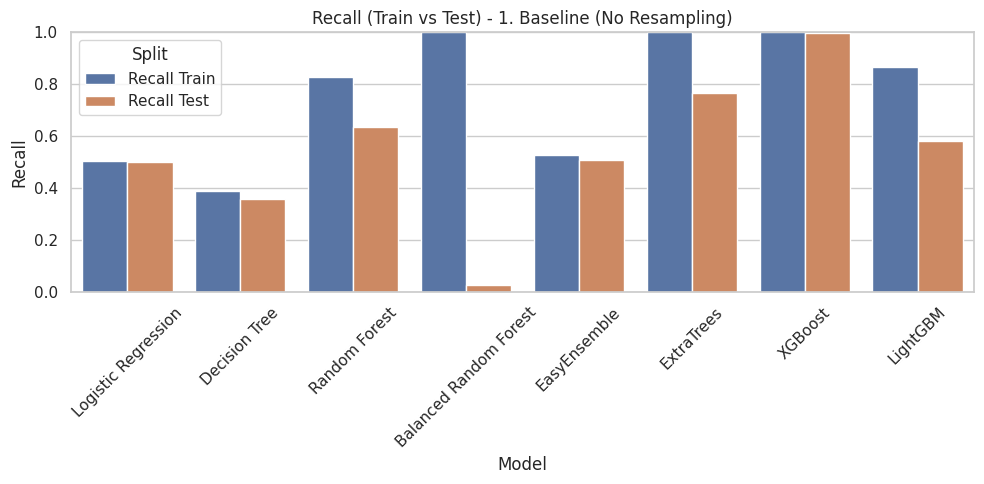

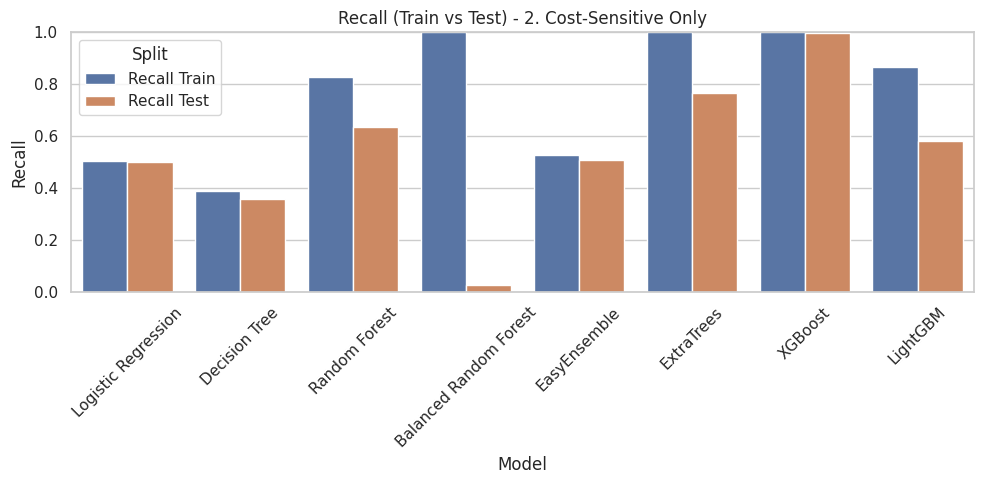

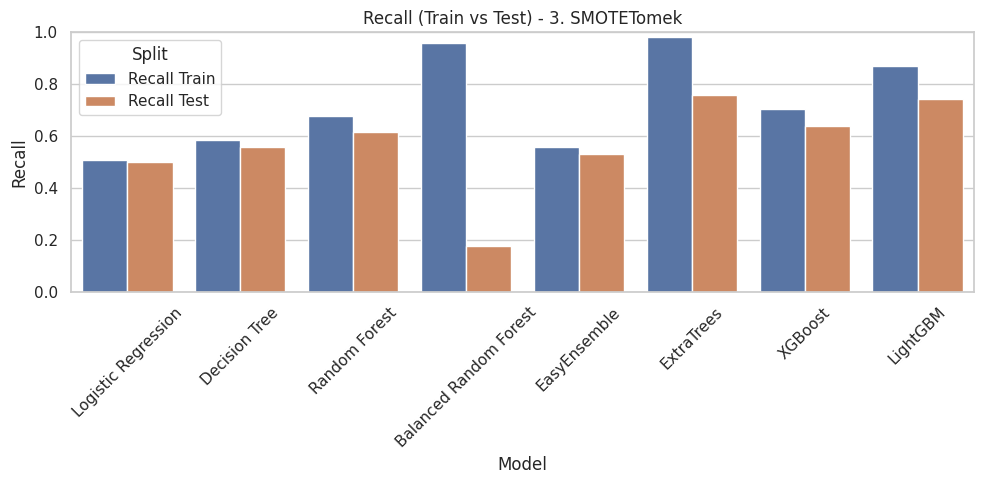

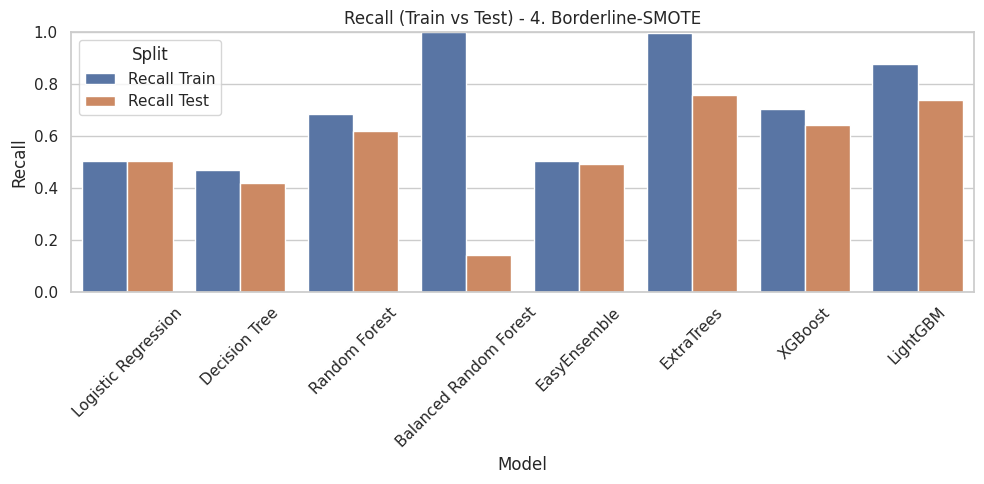

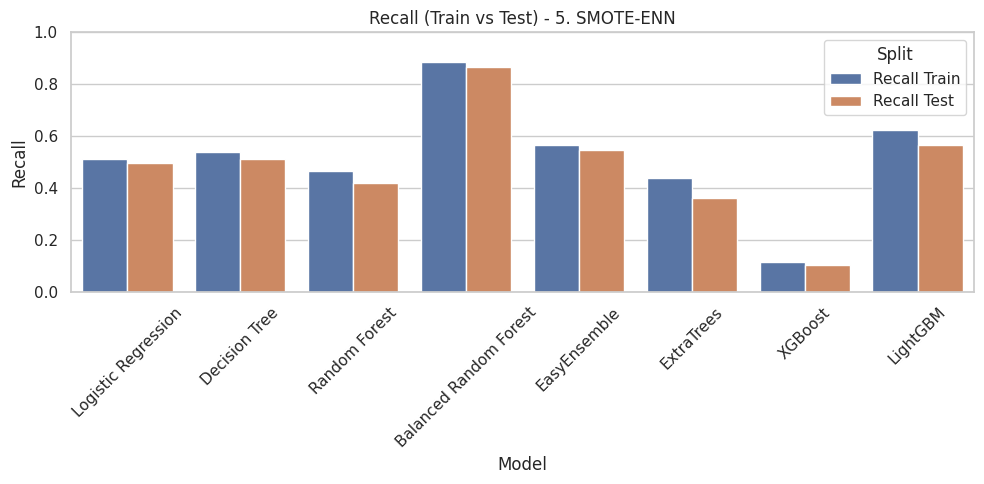

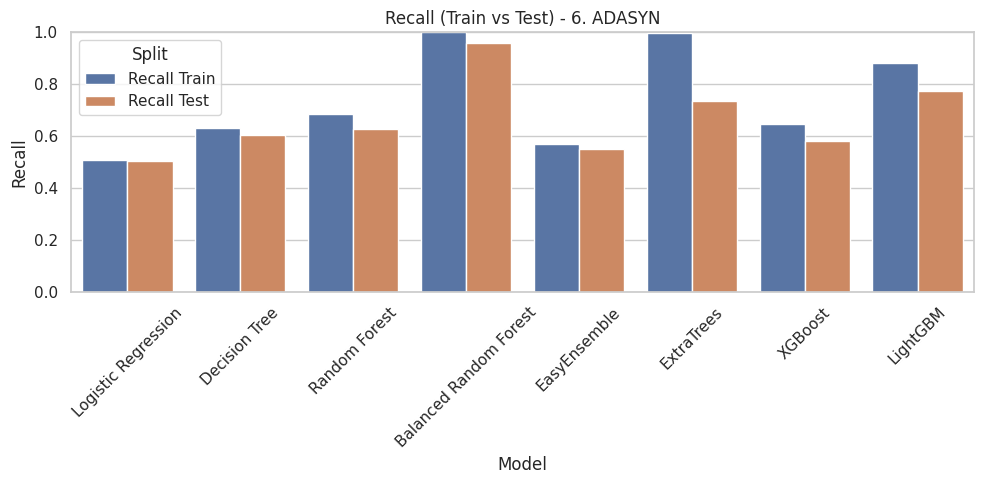

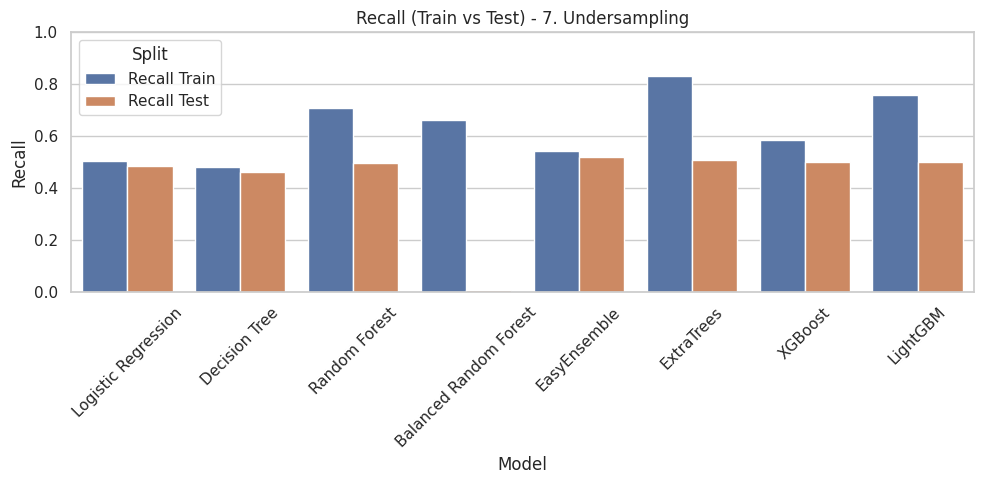

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

for scenario in overfit_df["Scenario"].unique():
    subset = overfit_df[overfit_df["Scenario"] == scenario]

    plt.figure(figsize=(10, 5))
    plot_df = subset.melt(
        id_vars=["Model"],
        value_vars=["Recall Train", "Recall Test"],
        var_name="Split",
        value_name="Recall"
    )

    sns.barplot(data=plot_df, x="Model", y="Recall", hue="Split")
    plt.title(f"Recall (Train vs Test) - {scenario}")
    plt.ylim(0, 1)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


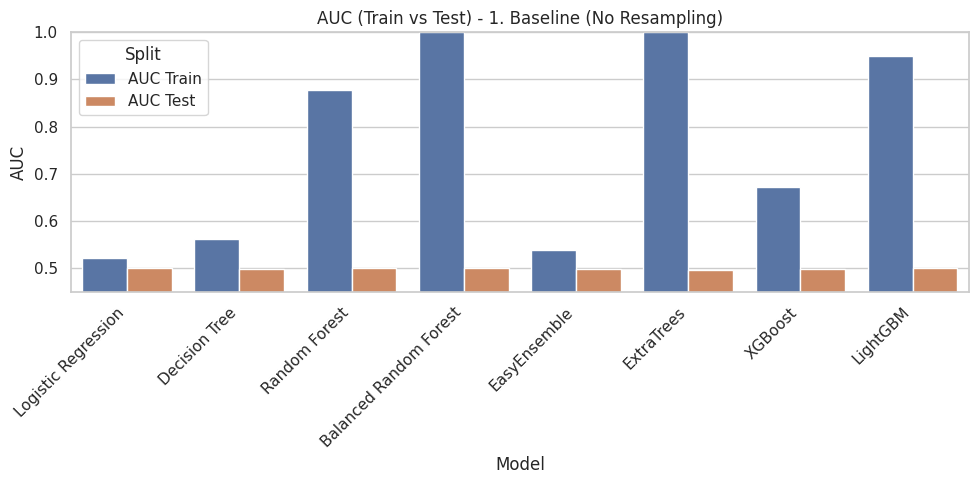

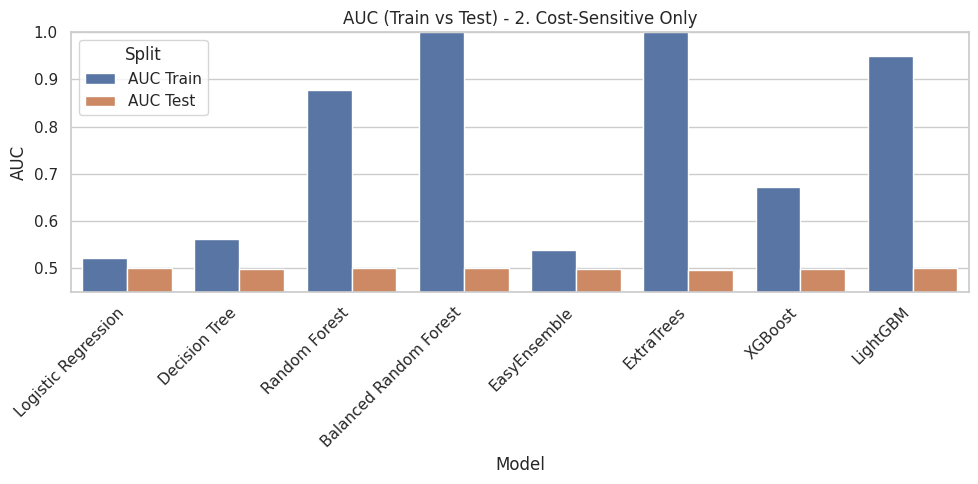

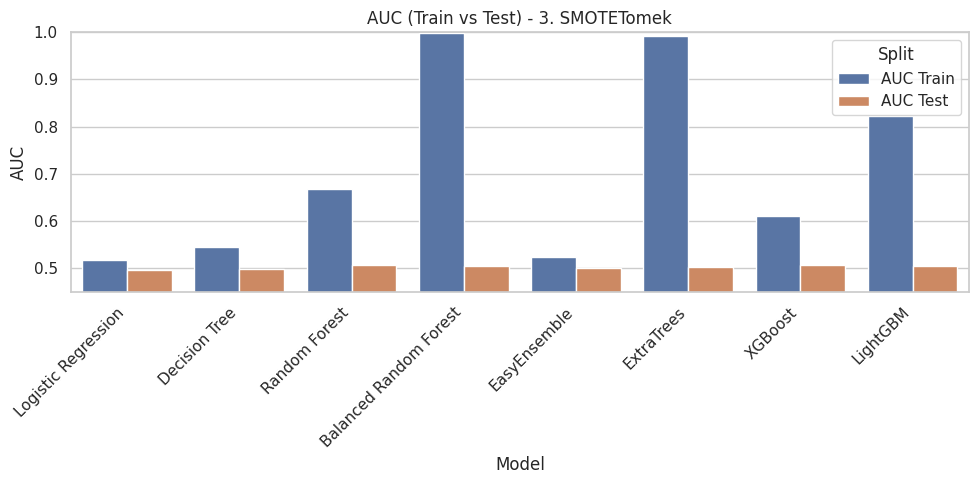

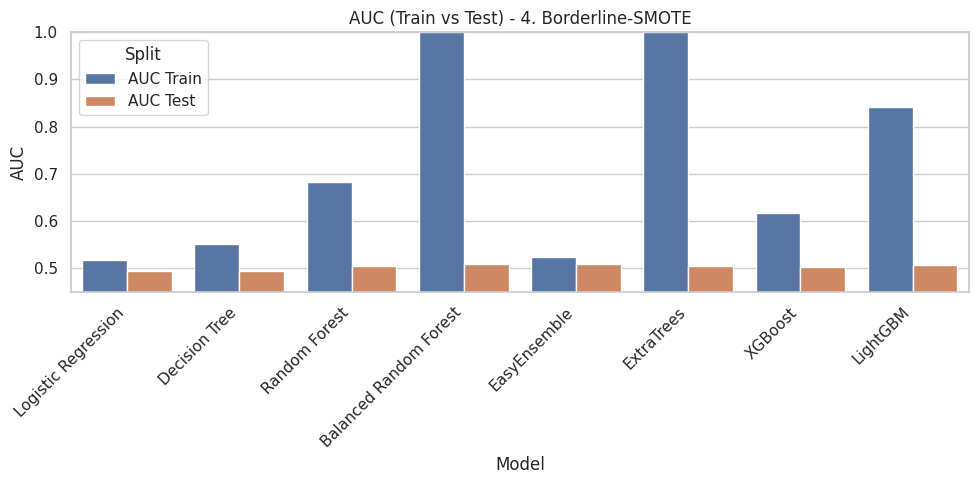

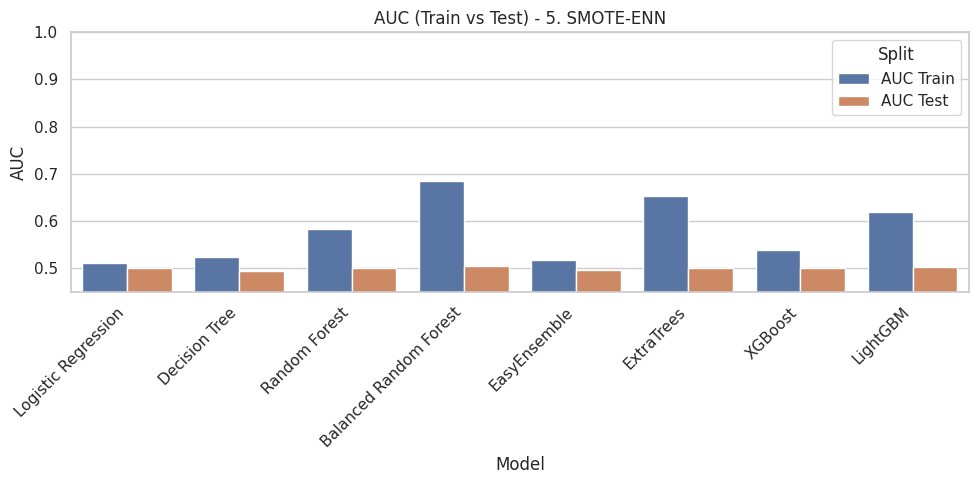

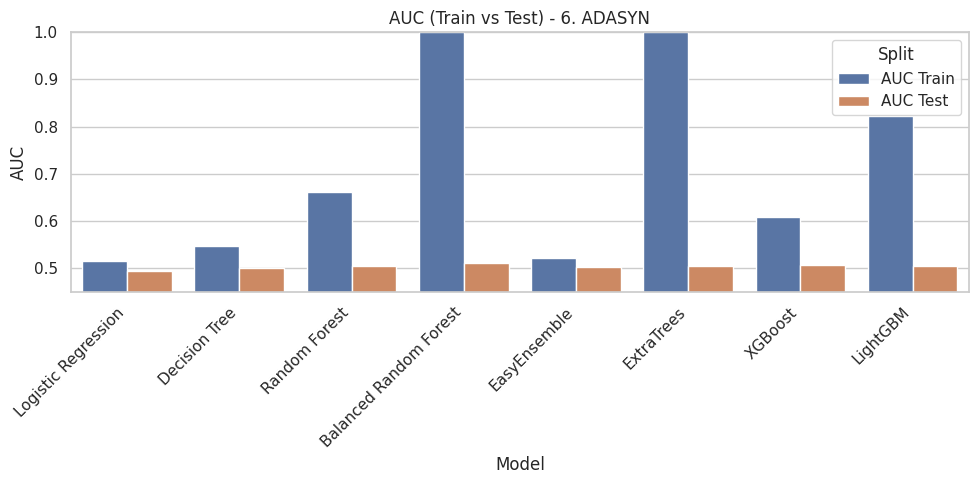

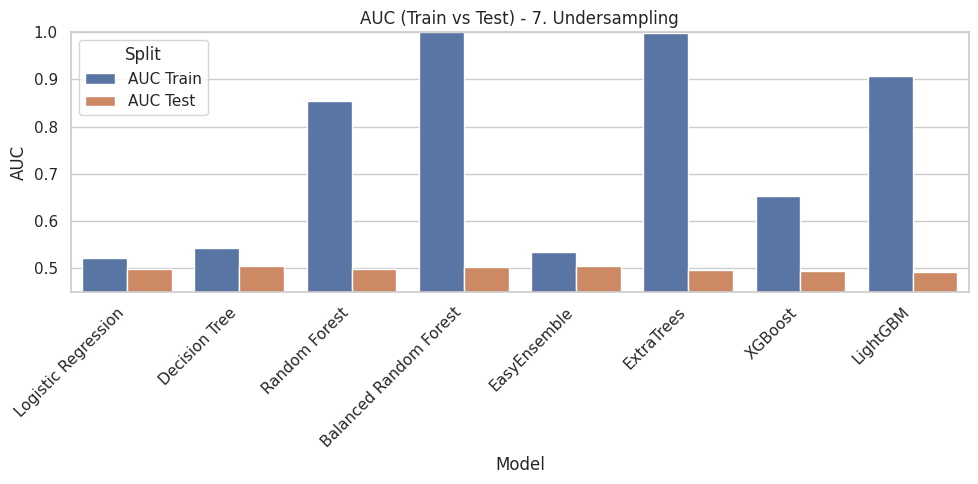

In [ ]:
for scenario in overfit_df["Scenario"].unique():
    subset = overfit_df[overfit_df["Scenario"] == scenario]

    plt.figure(figsize=(10, 5))
    plot_df = subset.melt(
        id_vars=["Model"],
        value_vars=["AUC Train", "AUC Test"],
        var_name="Split",
        value_name="AUC"
    )

    sns.barplot(data=plot_df, x="Model", y="AUC", hue="Split")

    plt.title(f"AUC (Train vs Test) - {scenario}")
    plt.ylim(0.45, 1)     # AGAR AUC TEST TERLIHAT
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()


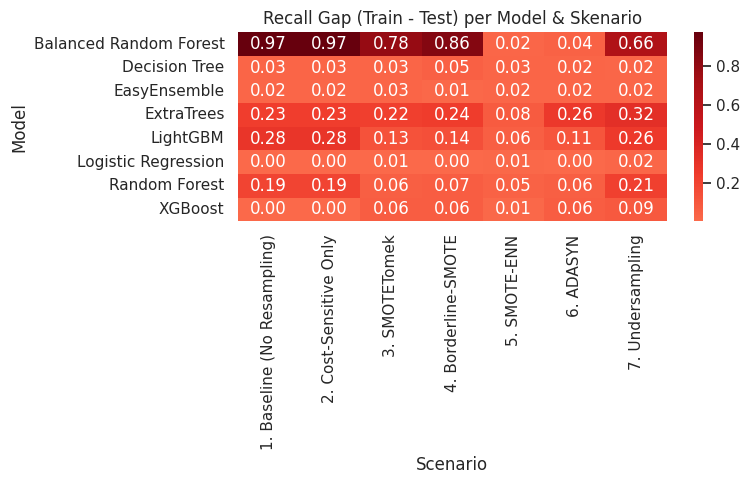

In [ ]:
# === HEATMAP GAP RECALL ===
recall_gap_pivot = overfit_df.pivot(
    index="Model",
    columns="Scenario",
    values="Recall Gap"
)

plt.figure(figsize=(8, 5))
sns.heatmap(recall_gap_pivot, annot=True, fmt=".2f", cmap="Reds", center=0)
plt.title("Recall Gap (Train - Test) per Model & Skenario")
plt.tight_layout()
plt.show()


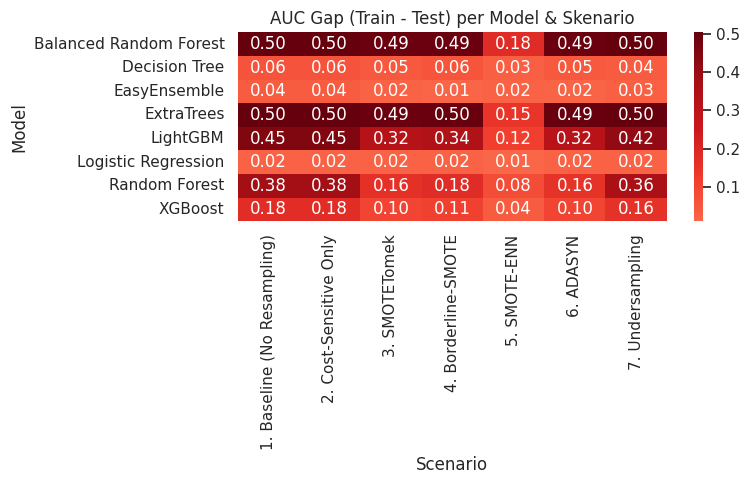

In [ ]:
# === HEATMAP GAP AUC ===
auc_gap_pivot = overfit_df.pivot(
    index="Model",
    columns="Scenario",
    values="AUC Gap"
)

plt.figure(figsize=(8, 5))
sns.heatmap(auc_gap_pivot, annot=True, fmt=".2f", cmap="Reds", center=0)
plt.title("AUC Gap (Train - Test) per Model & Skenario")
plt.tight_layout()
plt.show()


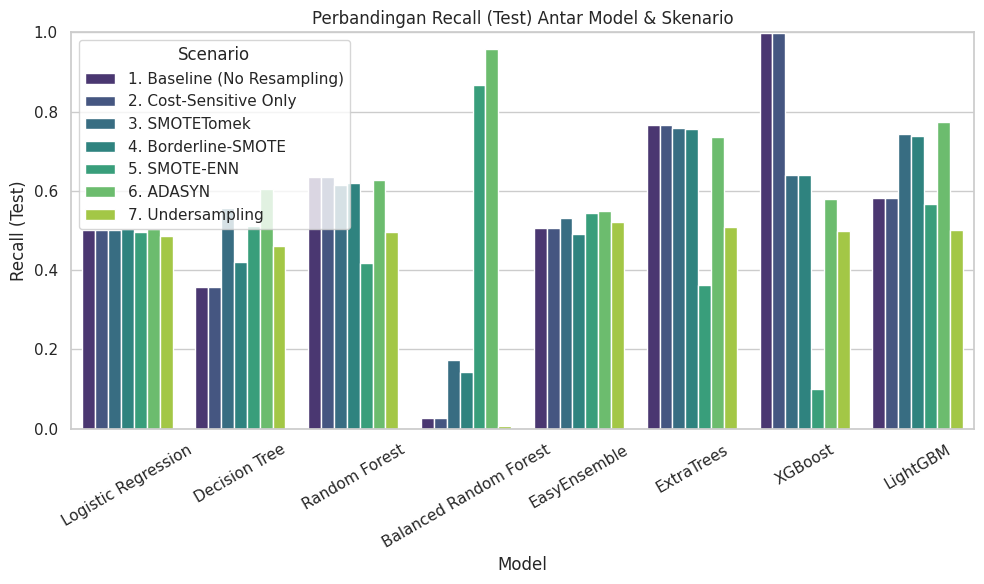

In [ ]:
# === Perbandingan Recall Test ===
plt.figure(figsize=(10, 6))
sns.barplot(
    data=results_df,
    x="Model",
    y="Recall Test",
    hue="Scenario",
    palette="viridis"
)
plt.title("Perbandingan Recall (Test) Antar Model & Skenario")
plt.ylabel("Recall (Test)")
plt.ylim(0, 1)
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


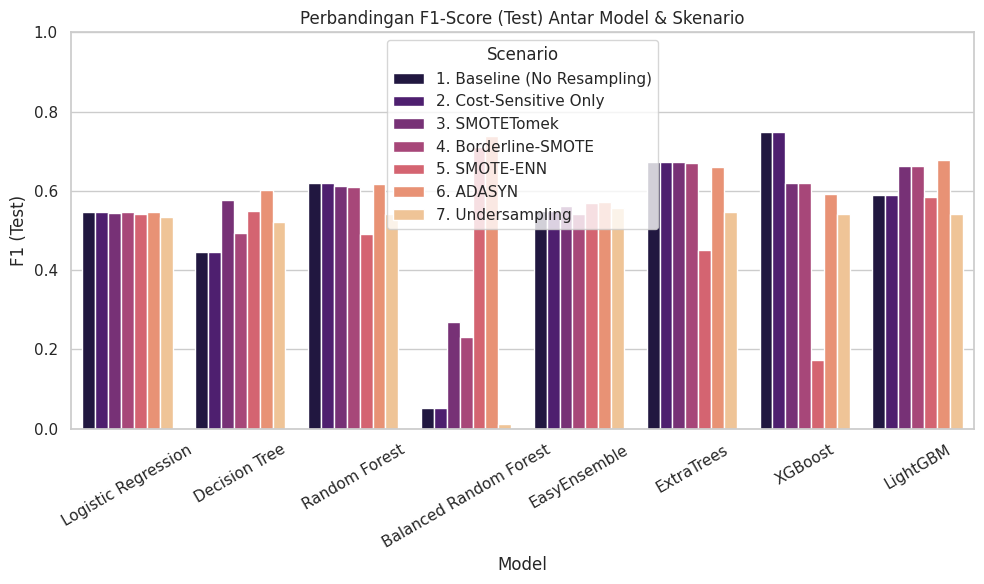

In [ ]:
# === Perbandingan F1 Test ===
plt.figure(figsize=(10, 6))
sns.barplot(
    data=results_df,
    x="Model",
    y="F1 Test",
    hue="Scenario",
    palette="magma"
)
plt.title("Perbandingan F1-Score (Test) Antar Model & Skenario")
plt.ylabel("F1 (Test)")
plt.ylim(0, 1)
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


# Output CSV Risk Level

In [ ]:
from imblearn.combine import SMOTEENN
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.base import clone

best_scenario = "5. SMOTE-ENN"
best_model_name = "Balanced Random Forest"

best_model = clone(models[best_model_name])

# Pilih balancer sesuai skenario terbaik
if best_scenario == "5. SMOTE-ENN":
    balancer = SMOTEENN(random_state=42)
elif best_scenario == "3. SMOTETomek":
    from imblearn.combine import SMOTETomek
    balancer = SMOTETomek(random_state=42)
elif best_scenario == "6. ADASYN":
    from imblearn.over_sampling import ADASYN
    balancer = ADASYN(random_state=42)
else:
    balancer = None  # kalau nanti skenario lain

steps = [("preprocess", preprocess)]
if balancer is not None:
    steps.append(("balance", balancer))
steps.append(("clf", best_model))

best_pipeline = ImbPipeline(steps=steps)

print(f"Retraining pipeline for {best_model_name} with {best_scenario}...")
best_pipeline.fit(X_train, y_train)


y_test_proba = best_pipeline.predict_proba(X_test)[:, 1]

# Build EWS dataset (ambil kembali baris asli df sesuai X_test.index)
ews_df = df.loc[X_test.index].copy()
ews_df["Actual_Delay_Status"] = y_test.values
ews_df["Delay_Probability"] = y_test_proba

# Risk level mapping
def assign_risk_level(prob):
    if prob < 0.33:
        return "Low Risk"
    elif prob < 0.66:
        return "Moderate Risk"
    else:
        return "High Risk"

ews_df["Risk_Level"] = ews_df["Delay_Probability"].apply(assign_risk_level)


important_cols = [
    "timestamp",
    "vehicle_gps_latitude",
    "vehicle_gps_longitude",
    "route_risk_level",
    "Risk_Level",
    "Delay_Probability",
    "Actual_Delay_Status"
]

# Biar aman kalau ada kolom yang nggak ada
available_cols = [c for c in important_cols if c in ews_df.columns]
final_report = ews_df[available_cols].sort_values(
    by="Delay_Probability", ascending=False
)

print("\n=== DISTRIBUSI RISIKO ===")
print(final_report["Risk_Level"].value_counts())

print("\n=== TOP 5 HIGH-RISK ===")
display(final_report.head(5))

final_report.to_csv("shipment_early_warning_report.csv", index=False)
print("Report saved!")


Retraining pipeline for Balanced Random Forest with 5. SMOTE-ENN...

=== DISTRIBUSI RISIKO ===
Risk_Level
Moderate Risk    4368
High Risk        1937
Low Risk          108
Name: count, dtype: int64

=== TOP 5 HIGH-RISK ===


timestamp  vehicle_gps_latitude  vehicle_gps_longitude  \
31140 2024-07-21 12:00:00             48.784998             -99.800139   
27110 2024-02-04 14:00:00             49.172001             -85.194272   
25664 2023-12-06 08:00:00             48.673749            -113.801239   
29259 2024-05-04 03:00:00             49.794252             -87.762748   
28439 2024-03-30 23:00:00             40.859433             -92.020262   

       route_risk_level Risk_Level  Delay_Probability  Actual_Delay_Status  
31140          7.323434  High Risk           0.820000                    0  
27110          7.501795  High Risk           0.813333                    1  
25664          8.832733  High Risk           0.806667                    0  
29259          7.251526  High Risk           0.806667                    1  
28439          7.835806  High Risk           0.806667                    1

Report saved!


Re-training FINAL BRF + SMOTE-ENN pipeline for SHAP explanation...
SHAP values computed for sample of size: 500


/tmp/ipython-input-942016045.py:106: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values_for_plot, X_shap_sample, plot_type="bar", max_display=15, show=False)
/usr/local/lib/python3.12/dist-packages/shap/plots/_beeswarm.py:723: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  summary_legacy(
/usr/local/lib/python3.12/dist-packages/shap/plots/_beeswarm.py:743: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  summary_legacy(


<Figure size 1000x700 with 0 Axes>

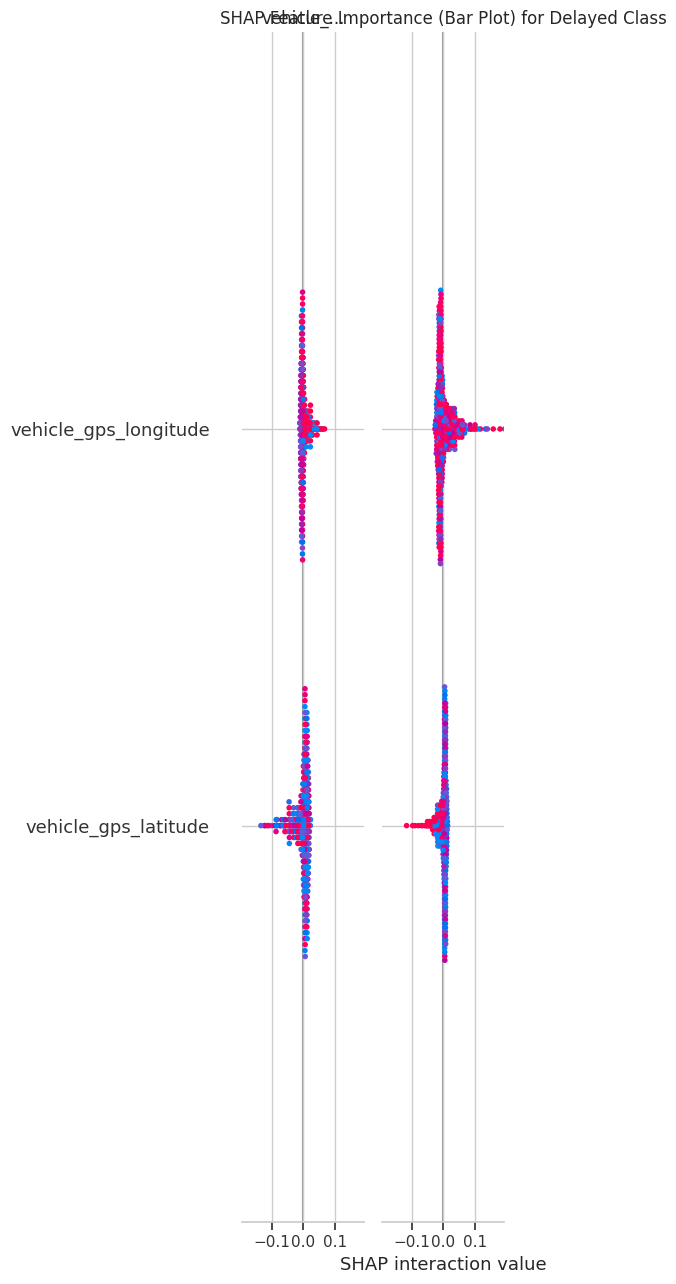

/tmp/ipython-input-942016045.py:113: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values_for_plot, X_shap_sample, max_display=15, show=False) # plot_type default to "dot" (beeswarm)
/usr/local/lib/python3.12/dist-packages/shap/plots/_beeswarm.py:723: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  summary_legacy(
/usr/local/lib/python3.12/dist-packages/shap/plots/_beeswarm.py:743: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  summary_

<Figure size 1000x700 with 0 Axes>

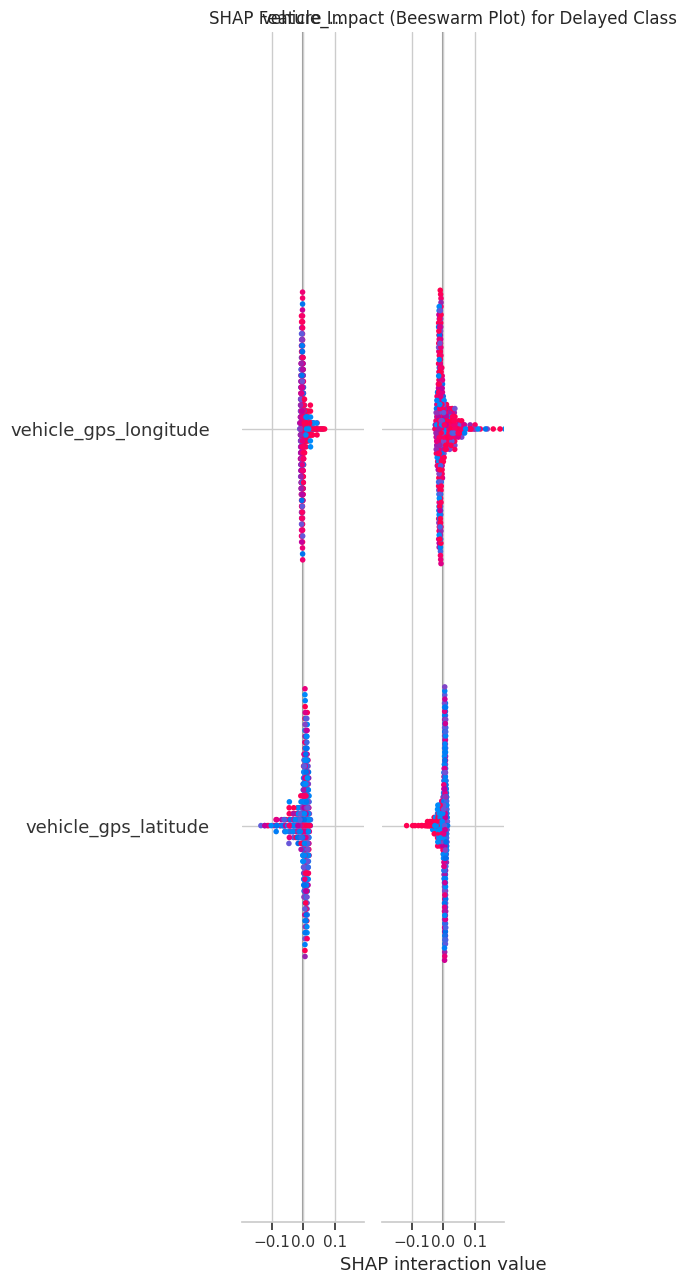

In [ ]:
import shap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # Import pyplot explicitly for better control

from imblearn.combine import SMOTEENN
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.base import clone
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# --- Redefine preprocess and its dependencies within this cell ---
# Assuming X_train, y_train, X_test are already defined from previous cells.
num_cols = X_train.select_dtypes(include=np.number).columns.tolist()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocess = ColumnTransformer([
    ("num", numeric_transformer, num_cols),
    ("cat", categorical_transformer, cat_cols)
])

# --- Re-define and Re-fit the final_ews_pipe ---
smote_enn = SMOTEENN(random_state=42)

best_brf = BalancedRandomForestClassifier(
    n_estimators=400,
    max_depth=None,
    sampling_strategy="auto",
    n_jobs=-1,
    random_state=42
)

final_ews_pipe = ImbPipeline(steps=[
    ("preprocess", preprocess),
    ("balance", smote_enn),
    ("clf", best_brf)
])

print("Re-training FINAL BRF + SMOTE-ENN pipeline for SHAP explanation...")
final_ews_pipe.fit(X_train, y_train)

# --- SHAP Explanation Setup ---
fitted_preprocessor = final_ews_pipe.named_steps['preprocess']
fitted_classifier = final_ews_pipe.named_steps['clf']

X_test_preprocessed = fitted_preprocessor.transform(X_test)

# Convert to dense array if it's sparse (OneHotEncoder can produce sparse output)
if hasattr(X_test_preprocessed, 'toarray'):
    X_test_preprocessed = X_test_preprocessed.toarray()

original_feature_names = fitted_preprocessor.get_feature_names_out()

# Create cleaner feature names for better plot readability
cleaner_feature_names = []
for name in original_feature_names:
    if name.startswith('num__'):
        cleaner_feature_names.append(name[5:]) # Remove 'num__' prefix
    elif name.startswith('cat__'):
        # Example: 'cat__risk_classification_High Risk' -> 'risk_classification (High Risk)'
        # Remove 'cat__' and parse for cleaner categorical labels
        parts = name[5:].split('_', 1)
        if len(parts) > 1 and parts[0] == 'timestamp':
             cleaner_feature_names.append(f"{parts[0]}_{parts[1]}") # For time features like timestamp_hour
        elif len(parts) > 1:
            cleaner_feature_names.append(f"{parts[0]} ({parts[1].replace('X0_', '')})") # General categorical features
        else:
            cleaner_feature_names.append(name[5:]) # Fallback if no specific category value is discernible
    else:
        cleaner_feature_names.append(name) # Keep as is if no prefix

X_test_preprocessed_df = pd.DataFrame(X_test_preprocessed, columns=cleaner_feature_names)

# Inisialisasi SHAP TreeExplainer
explainer = shap.TreeExplainer(fitted_classifier)

sample_size = min(500, X_test_preprocessed_df.shape[0])
X_shap_sample = X_test_preprocessed_df.sample(sample_size, random_state=42)

shap_values = explainer.shap_values(X_shap_sample)

# For binary classification, shap_values is a list [shap_values_class_0, shap_values_class_1]
# We are interested in the positive class (delayed), which is typically index 1.
if isinstance(shap_values, list):
    shap_values_for_plot = shap_values[1]
else:
    shap_values_for_plot = shap_values

print("SHAP values computed for sample of size:", sample_size)

# --- Generate SHAP Plots ---
# Bar plot for global feature importance
plt.figure(figsize=(10, 7)) # Adjust figure size for better readability
shap.summary_plot(shap_values_for_plot, X_shap_sample, plot_type="bar", max_display=15, show=False)
plt.title("SHAP Feature Importance (Bar Plot) for Delayed Class")
plt.tight_layout()
plt.show()

# Beeswarm plot for individual feature impact and direction
plt.figure(figsize=(10, 7)) # Adjust figure size for better readability
shap.summary_plot(shap_values_for_plot, X_shap_sample, max_display=15, show=False) # plot_type default to "dot" (beeswarm)
plt.title("SHAP Feature Impact (Beeswarm Plot) for Delayed Class")
plt.tight_layout()
plt.show()